<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">SHOE BRAND CAPSTONE PROJECT: EDA and Machine Learning </b>
 </div>

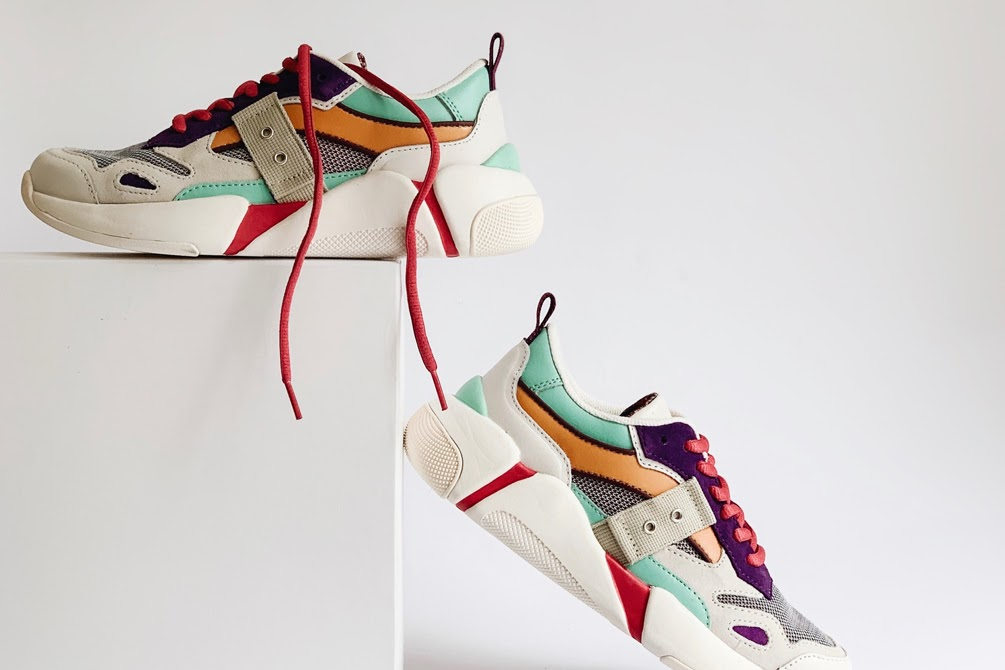

## **Project Description**


I have efficiently collected data from six major websites—Nike, Adidas, Puma, Skechers, Columbia, and Woodland. The corresponding SQL queries have been successfully executed. Subsequently, I have initiated on a machine learning project with the primary objective of conducting a thorough analysis of the collected data from these websites.

The project involves a detailed examination of various aspects, including product categories, pricing structures, distribution strategies, reviews distribution, marketing methods, customer sentiments, and the impact of different factors on customer satisfaction. This in-depth analysis aims to provide valuable insights for the ongoing machine learning project.







## **Procedure for Data Extraction and extracted Data Details**

I applied Python's Selenium and BeautifulSoup to retrieve data through direct scraping from the six websites. The program systematically navigated through the men's and women's shoe sections, capturing pertinent details along the way.

I have retrieved data including 'shoe_name', 'original_price', 'discounted_price', 'url', 'category', 'review_count', 'star', 'product_code', 'shoe_type', 'durability', 'comfort', 'size', 'size_count', 'color_count', 'brand', 'color_1', 'color_2', 'color_3', 'color_4', and 'color_5'.

**I obtained the 'shoe_type' data to enhance my understanding of market demand. Consequently, I will utilize the initially extracted dataset for more effective data analysis and further machine learning tasks.**


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Bringing in Vital Libraries</b>
 </div>

In [478]:
# Data Manipulation
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations

# Data Visualization
import seaborn as sns  # Statistical Data Visualization
import matplotlib.pyplot as plt  # Plotting
# Jupyter Notebook Integration # Inline plotting in the notebook environment
%matplotlib inline

# Visualizing Missing Data
import missingno as msno  # Visualizing Missing Data

# Suppressing Warnings
import warnings  # Suppressing warnings
warnings.filterwarnings("ignore")  # Ignore warnings

# Data Preprocessing
from scipy.stats import zscore  # Z-Score transformation
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder  # Data preprocessing tools
from imblearn.over_sampling import SMOTE  # Over-sampling for imbalanced datasets


# Statistical Analysis
import scipy.stats as stats  # Statistical functions and tests
from statsmodels.stats.outliers_influence import variance_inflation_factor # Detect multicollinearity with VIF


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation tools
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, auc  # Classification metrics and ROC curve tools
)
# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC   # Support Vector Classifier


# Model Persistence - Save and load machine learning models
import joblib

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Fetching the Dataset</b>
 </div>

In [479]:
df=pd.read_csv('final_shoe_details_dataset.csv')
df

,shoe_name,original_price,discounted_price,url,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand,color_1,color_2,color_3,color_4,color_5
0,Deviate Nitro 2 Winterised women's Trail Runni...,"9,599","15,999",https://in.puma.com/in/en/pd/deviate-nitro-2-w...,women,NaN,NaN,376857_01,Trail Running Shoes,NaN,NaN,NaN,4.0,1,Puma,NaN,NaN,NaN,NaN,NaN
1,Cilia Lux women's Sneakers,"3,299","5,999",https://in.puma.com/in/en/pd/cilia-lux-womens-...,women,NaN,NaN,370282_09,Sneakers,NaN,NaN,NaN,1.0,1,Puma,NaN,NaN,NaN,NaN,NaN
2,Fier Nitro women's Sneakers,"4,799","7,999",https://in.puma.com/in/en/pd/fier-nitro-womens...,women,NaN,NaN,389932_01,Sneakers,NaN,NaN,NaN,3.0,2,Puma,PUMA Black,Rose Dust,NaN,NaN,NaN
3,Fier Nitro women's Sneakers,"4,799","7,999",https://in.puma.com/in/en/pd/fier-nitro-womens...,women,NaN,NaN,389932_02,Sneakers,NaN,NaN,NaN,2.0,2,Puma,PUMA Black,Rose Dust,NaN,NaN,NaN
4,Cali Dream Brand Love women's Sneakers,"4,499","8,999",https://in.puma.com/in/en/pd/cali-dream-brand-...,women,NaN,NaN,394757_01,Sneakers,NaN,NaN,NaN,1.0,2,Puma,PUMA White-Hot Heat,PUMA White-Peach Smoothie,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,FORUM BOLD SHOES,10 999.00,NaN,https://www.adidas.co.in/forum-bold-shoes/IG02...,women,28,NaN,IG0285,Originals,85,75,49.0,NaN,2,adidas,Off White / Wonder Clay / Wonder Blue,Off White / Clear Sky / Cloud White,NaN,NaN,NaN
11029,ADIZERO SL,11 999.00,7 199.50,https://www.adidas.co.in/adizero-sl/ID6921.html,men,492,NaN,ID6921,Running,86,82,46.0,NaN,2,adidas,Arctic Night F23 / Cloud White / Wonder Blue F23,Core Black / Iron Metallic / Cloud White,NaN,NaN,NaN
11030,ADIZERO SL,11 999.00,7 199.50,https://www.adidas.co.in/adizero-sl/ID6926.html,men,492,NaN,ID6926,Running,86,82,46.0,NaN,2,adidas,Arctic Night F23 / Cloud White / Wonder Blue F23,Core Black / Iron Metallic / Cloud White,NaN,NaN,NaN
11031,CONTEM X SHOES,3 999.00,2 599.50,https://www.adidas.co.in/contem-x-shoes/IQ8887...,women,3,NaN,IQ8887,Running,91,91,50.0,NaN,2,adidas,Bordeaux / Core Black,Shadow Violet F23 / Silver Violet S23 / Semi I...,NaN,NaN,NaN


In [480]:
df.head()

,shoe_name,original_price,discounted_price,url,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand,color_1,color_2,color_3,color_4,color_5
0,Deviate Nitro 2 Winterised women's Trail Runni...,"9,599","15,999",https://in.puma.com/in/en/pd/deviate-nitro-2-w...,women,NaN,NaN,376857_01,Trail Running Shoes,NaN,NaN,NaN,4.0,1,Puma,NaN,NaN,NaN,NaN,NaN
1,Cilia Lux women's Sneakers,"3,299","5,999",https://in.puma.com/in/en/pd/cilia-lux-womens-...,women,NaN,NaN,370282_09,Sneakers,NaN,NaN,NaN,1.0,1,Puma,NaN,NaN,NaN,NaN,NaN
2,Fier Nitro women's Sneakers,"4,799","7,999",https://in.puma.com/in/en/pd/fier-nitro-womens...,women,NaN,NaN,389932_01,Sneakers,NaN,NaN,NaN,3.0,2,Puma,PUMA Black,Rose Dust,NaN,NaN,NaN
3,Fier Nitro women's Sneakers,"4,799","7,999",https://in.puma.com/in/en/pd/fier-nitro-womens...,women,NaN,NaN,389932_02,Sneakers,NaN,NaN,NaN,2.0,2,Puma,PUMA Black,Rose Dust,NaN,NaN,NaN
4,Cali Dream Brand Love women's Sneakers,"4,499","8,999",https://in.puma.com/in/en/pd/cali-dream-brand-...,women,NaN,NaN,394757_01,Sneakers,NaN,NaN,NaN,1.0,2,Puma,PUMA White-Hot Heat,PUMA White-Peach Smoothie,NaN,NaN,NaN


In [481]:
df.tail()

,shoe_name,original_price,discounted_price,url,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand,color_1,color_2,color_3,color_4,color_5
11028,FORUM BOLD SHOES,10 999.00,NaN,https://www.adidas.co.in/forum-bold-shoes/IG02...,women,28,NaN,IG0285,Originals,85,75,49.0,NaN,2,adidas,Off White / Wonder Clay / Wonder Blue,Off White / Clear Sky / Cloud White,NaN,NaN,NaN
11029,ADIZERO SL,11 999.00,7 199.50,https://www.adidas.co.in/adizero-sl/ID6921.html,men,492,NaN,ID6921,Running,86,82,46.0,NaN,2,adidas,Arctic Night F23 / Cloud White / Wonder Blue F23,Core Black / Iron Metallic / Cloud White,NaN,NaN,NaN
11030,ADIZERO SL,11 999.00,7 199.50,https://www.adidas.co.in/adizero-sl/ID6926.html,men,492,NaN,ID6926,Running,86,82,46.0,NaN,2,adidas,Arctic Night F23 / Cloud White / Wonder Blue F23,Core Black / Iron Metallic / Cloud White,NaN,NaN,NaN
11031,CONTEM X SHOES,3 999.00,2 599.50,https://www.adidas.co.in/contem-x-shoes/IQ8887...,women,3,NaN,IQ8887,Running,91,91,50.0,NaN,2,adidas,Bordeaux / Core Black,Shadow Violet F23 / Silver Violet S23 / Semi I...,NaN,NaN,NaN
11032,CONTEM X SHOES,3 999.00,2 599.50,https://www.adidas.co.in/contem-x-shoes/IQ8888...,women,3,NaN,IQ8888,Running,91,91,50.0,NaN,2,adidas,Bordeaux / Core Black,Shadow Violet F23 / Silver Violet S23 / Semi I...,NaN,NaN,NaN


In [482]:
df.sample()

,shoe_name,original_price,discounted_price,url,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand,color_1,color_2,color_3,color_4,color_5
10377,HITRAIL MID WPN SHOES,5 999.00,NaN,https://www.adidas.co.in/hitrail-mid-wpn-shoes...,men,3,NaN,IQ8722,TERREX,75,83,50.0,NaN,2,adidas,Olive Strata / Stone / Fango / Preloved Yellow,Tech Indigo / Stone / Night Sky / Lucid Cyan,NaN,NaN,NaN


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">A Comprehensive Analysis of the Dataset</b>
 </div>

**Features/Attribute/Independent Variables:**

**shoe_name:** Name of the shoe.

**discounted_price:** Discounted price of the shoe.

**url:** URL link to the product.

**category:** Category of the shoe (e.g., men, women).

**review_count:** Number of reviews for the shoe.

**product_code:** Product code or identifier.

**shoe_type:** Type of shoe (e.g., Running Shoes, Sneakers).

**durability:** Durability rating of the shoe.

**comfort:** Comfort rating of the shoe.

**size:** Product fit and dimensions indication. (given feedback percentage by buyers)

**size_count:** Count of available sizes.

**color_count:** Count of available colors.

**brand:**  website name

**color_1, color_2, color_3, color_4, color_5:** Different color options for
 the shoe.

 **Label/Target/Dependent Variables:**

**original_price:** Original price of the shoe.

**star:** Star rating of the shoe.

**Let's undersatnd the requirements:-**

> **Requirements is given:-**

**Write the complete Machine learning code to make predictions of price and star rating .Use appropriate models on their label basis. Remember you need to make 2 different predictions: price  and star rating.**



**Observation from the Target Variable data**

### Objective 1:-

**Target Variable: original_price (Regression)**

**Explanation:**

When anticipating the initial cost of a shoe, the target variable, labeled as "Original_Price," denotes the starting price before any discounts or promotions. This task falls under regression, focusing on predicting the numerical value of the original price.

### Objective 2:-

**Target Variable: star (star_rating) (Classification)**

**Explanation:**

When aiming to forecast specific discrete categories or bins of star ratings (e.g., 1 star, 2 stars, 3 stars), then it is treated as a classification problem. In this context, the algorithm is dedicated to categorizing each rating into a predefined class, placing it within a specific group. The aim is to precisely predict the qualitative category of a star rating, emphasizing broader qualitative distinctions rather than exact numerical values. This strategy proves valuable for comprehending and organizing ratings based on broader qualitative criteria.

**I will validate my dataset assumptions by conducting comprehensive exploratory data analysis, utilizing data visualizations, and performing various analytical processes to confirm my understanding.**


**workflow instructions:** The preliminary exploratory data analysis (EDA) will be nearly identical for both tasks. As a result, I will initiate the process with EDA, complete it, proceed to Objective 1, and subsequently move on to Objective 2."

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

In [483]:
df.shape

(11033, 20)

In [484]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 11033 rows and 20 columns.


In [485]:
df.columns.tolist()

['shoe_name',
 'original_price',
 'discounted_price',
 'url',
 'category',
 'review_count',
 'star',
 'product_code',
 'shoe_type',
 'durability',
 'comfort',
 'size',
 'size_count',
 'color_count',
 'brand',
 'color_1',
 'color_2',
 'color_3',
 'color_4',
 'color_5']

In [486]:
print(f"Data Types of DataFrame Columns:\n {df.dtypes}")

Data Types of DataFrame Columns:
 shoe_name            object
original_price       object
discounted_price     object
url                  object
category             object
review_count         object
star                 object
product_code         object
shoe_type            object
durability           object
comfort              object
size                float64
size_count          float64
color_count           int64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object


* Based on the provided data details, it's evident that addressing data type formatting and handling missing values are essential tasks.

**DataFrame Information Display**

In [487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   shoe_name         11033 non-null  object 
 1   original_price    11033 non-null  object 
 2   discounted_price  6018 non-null   object 
 3   url               11033 non-null  object 
 4   category          11033 non-null  object 
 5   review_count      7445 non-null   object 
 6   star              5509 non-null   object 
 7   product_code      11033 non-null  object 
 8   shoe_type         8362 non-null   object 
 9   durability        3864 non-null   object 
 10  comfort           4328 non-null   object 
 11  size              4875 non-null   float64
 12  size_count        9003 non-null   float64
 13  color_count       11033 non-null  int64  
 14  brand             11033 non-null  object 
 15  color_1           9420 non-null   object 
 16  color_2           9415 non-null   object

**Observations:**

> **Data Types:**

* The data types of columns like original_price, discounted_price, review_count, star, and others are currently 'object,' indicating potential non-numeric characters. These columns need conversion to appropriate numeric types for numerical analysis.

> **Missing Values:**

* Several columns, including discounted_price, review_count, star, and others, have varying counts of non-null values, It indicates the presence of missing data. Handling missing values is essential, and the extent varies across columns.

> **Categorical Columns:**

* Columns like category, shoe_type, brand, and color-related columns have 'object' data type, indicating categorical information.

> **Numeric Columns:**

* Columns like size_count are of type 'float64,' suitable for numerical analysis.

> **URL Column:**

* The url column is of 'object' type and might not provide meaningful numerical information. Consider specific handling based on analysis needs.

> **product_code**

* The producr_code is of 'object' type and might not require a numeric conversion if it serves identification purposes.

> **Color Columns:**

* Color-related columns (color_1, color_2, etc.) have varying counts of non-null values, indicating potential missing data. Consider appropriate handling based on analysis needs.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Checking Duplicate & Null Values</b>
 </div>

In [488]:
df.duplicated().sum()

0

* Let's examine the presence of null values to gain a clearer understanding of the dataset's data

In [489]:
# Checking the Null Values
df.isna().sum()

shoe_name              0
original_price         0
discounted_price    5015
url                    0
category               0
review_count        3588
star                5524
product_code           0
shoe_type           2671
durability          7169
comfort             6705
size                6158
size_count          2030
color_count            0
brand                  0
color_1             1613
color_2             1618
color_3             4859
color_4             7439
color_5             8684
dtype: int64

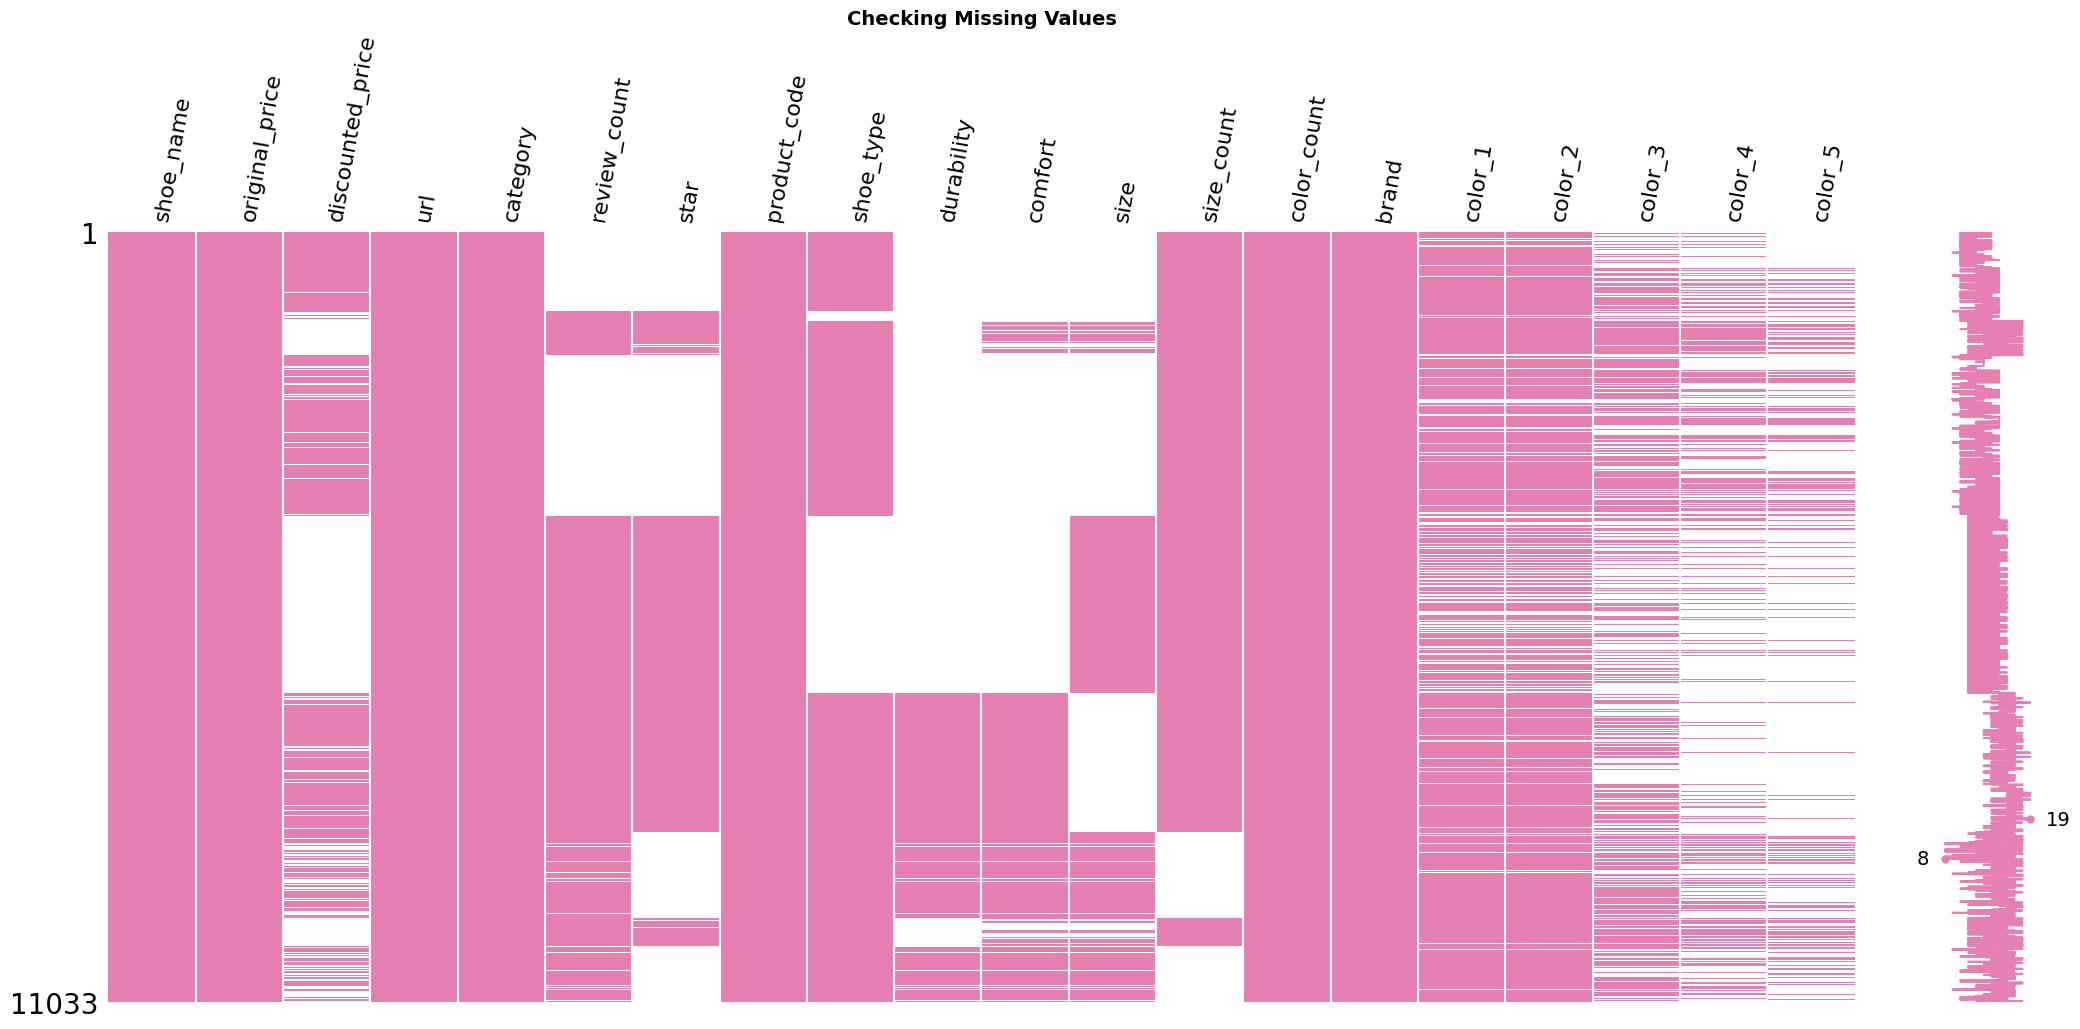

In [490]:
# Visiualizing missing data in DataFrame
msno.matrix(df, color=(0.9, 0.5, 0.7))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
plt.xticks(rotation=80)
plt.show()

In [491]:
columns_with_missing_values = [column for column in df.columns if df[column].isna().any()]

print(len(columns_with_missing_values), (columns_with_missing_values))

13 ['discounted_price', 'review_count', 'star', 'shoe_type', 'durability', 'comfort', 'size', 'size_count', 'color_1', 'color_2', 'color_3', 'color_4', 'color_5']


In [492]:
null_percentage = (df.isnull().sum() / len(df)) * 100

print(null_percentage)

shoe_name            0.000000
original_price       0.000000
discounted_price    45.454545
url                  0.000000
category             0.000000
review_count        32.520620
star                50.067978
product_code         0.000000
shoe_type           24.209191
durability          64.977794
comfort             60.772229
size                55.814375
size_count          18.399347
color_count          0.000000
brand                0.000000
color_1             14.619777
color_2             14.665096
color_3             44.040605
color_4             67.424998
color_5             78.709327
dtype: float64


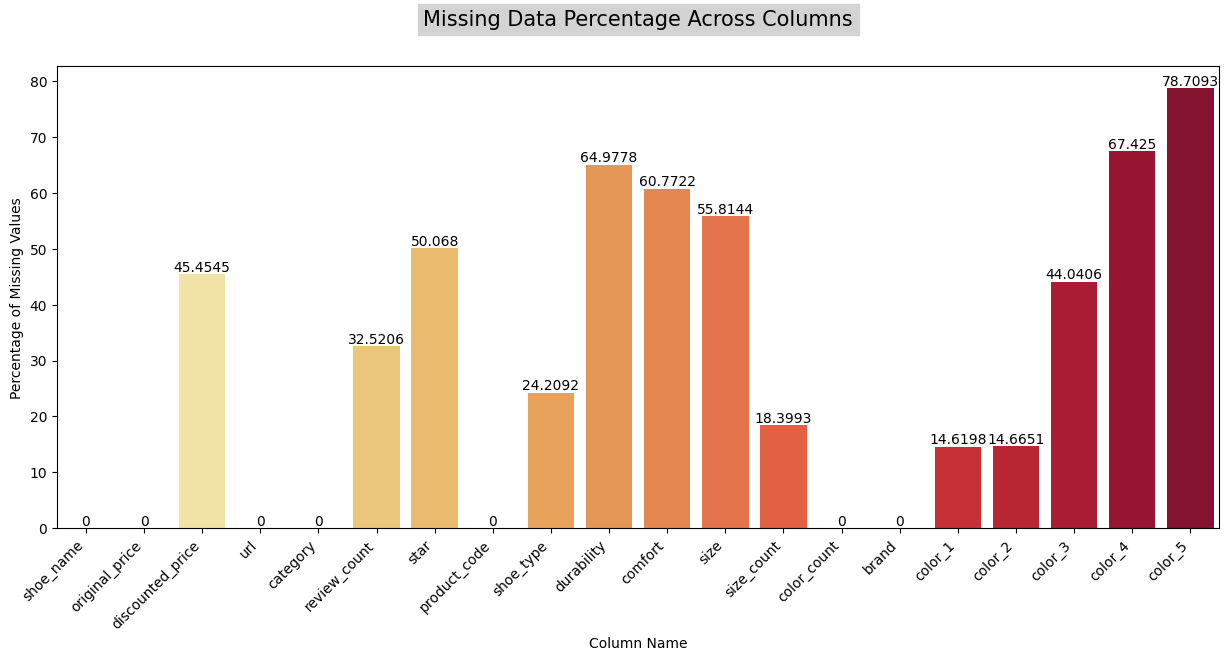

In [493]:
# bar plot to visualize missing data
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="YlOrRd")
ax.bar_label(ax.containers[0])
ax.set(xlabel='Column Name', ylabel='Percentage of Missing Values')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Missing Data Percentage Across Columns", fontsize=15, backgroundcolor='Lightgray', color='black', y=1.07)
plt.show()

The dataset encompasses information specific to the Indian region. I am examining which website exhibits higher demand, pricing, and quality in the Indian market.

### **Reason for missing data in Dataset:-**

> **discounted_price:** The absence of discounted prices in all website products results in missing values for the discounted_price column.

> **review_count and star (star_rating):** The review count and star rating sections are absent on several websites, including Woodland, Puma, and Columbia. Additionally, certain products across all websites lack information in both these categories, contributing to significant missing data.

> **shoe_type:** Shoe type information is unavailable on certain websites, specifically Columbia and Woodland. Additionally, there are products across various websites where the shoe type is not specified.

> **Durabilty/Comfot/Size:** The information pertains to buyer or customer feedback categories. However, these categories are unavailable for the websites Puma, Woodland, and Columbia. Furthermore, certain products exhibit either complete absence or partial missing values in these categories.

> **size_count:** Certain products may lack specific information or applicability regarding the count of available sizes.

> **color_1, color_2, color_3, color_4, and color_5:** Limited color options for certain products can result in null values in the corresponding color columns for colors that are not applicable. Additionally, some items may not come in multiple color variations, contributing to missing values in columns related to color information.


**I will begin by changing the data types of certain columns that require attention, and I will proceed to fill in any missing values.**

In [494]:
# Checking the data types to ensure consistency and compatibility.
df.dtypes

shoe_name            object
original_price       object
discounted_price     object
url                  object
category             object
review_count         object
star                 object
product_code         object
shoe_type            object
durability           object
comfort              object
size                float64
size_count          float64
color_count           int64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object

In [495]:
# Checking Unique Values in Columns
for column in df.columns:

    print(f"\033[1m{column}:\033[0m")

    unique_values = df[column].unique()
    print(unique_values)

    print('========' * 25)

shoe_name:
["Deviate Nitro 2 Winterised women's Trail Running Shoes"
 "Cilia Lux women's Sneakers" "Fier Nitro women's Sneakers" ...
 'PRIMIERTO SHOES' 'COS SUPERNOVA SHOES' 'PARK ST. SHOES']
original_price:
['9,599' '3,299' '4,799' '4,499' '3,569' '3,769' '5,399' '3,999' '3,759'
 '5,999' '7,999' '2,019' '2,999' '2,249' '2,159' '5,199' '3,849' '3,119'
 '4,229' '4,949' '4,049' '6,599' '2,339' '3,639' '3,709' '3,499' '9,099'
 '7,199' '2,879' '3,899' '4,459' '3,599' '4,399' '1,929' '4,899' '2,749'
 '4,119' '2,499' '3,149' '6,399' '6,749' '6,299' '4,769' '4,199' '3,749'
 '5,499' '3,839' '5,599' '6,999' '4,319' '2,819' '1,999' '3,969' '1,719'
 '2,109' '3,049' '2,699' '2,199' '2,319' '1,949' '0' '8,999' '11,399'
 '10,799' '11,999' '14,999' '1,749' '2,099' '1,919' '8,799' '9,349'
 '13,599' '11,199' '2,859' '10,399' '2,469' '2,119' '8,399' '12,799'
 '3,249' '5,219' '2,579' '3,019' '9,999' '10,999' '11,249' '16,999'
 '19,999' '12,599' '4,639' '7,799' '2,919' '3,009' '2,399' '3,369' '1,249'
 '1,

Before filling missing values, it is important to check unique values in each column. This step helps to understand data distribution, choose the right strategies for filling missing values, avoid unintended changes to data patterns, maintain consistency, and handle categorical data effectively.

In [496]:
# Remove commas and handle spaces as well, then convert to float
df['original_price'] = df['original_price'].str.replace(',', '').str.replace(' ', '').astype(float)
df["original_price"].dtype

dtype('float64')

In [497]:
# Replace 0.0 with NaN
df['original_price'] = df['original_price'].replace(0.0, np.nan)

# Calculate the median of the 'original_price' column
median_price = df['original_price'].median()
median_price

# Fill NaN values with the median
df['original_price'].fillna(median_price, inplace=True)


* To address the issue of some original prices being recorded as 0.0, I have resolved this by imputing the median value. This correction aims to mitigate the impact of the scraping issue on the original_price column.

In [498]:
# Remove commas and handle spaces as well, then convert to float
df["discounted_price"] = df["discounted_price"].str.replace(',', '').str.replace(' ', '').astype(float)
df["discounted_price"].dtype

dtype('float64')

The data types of "discounted_price" and "original_price" were modified to float in order to manage decimal values, ease numerical calculations, and ensure consistency with other numeric data in the dataset.

In [499]:
# Define the list of values to consider as NaN
nan_values = [np.nan, 'N/A', 'na', 'NaN', 'nan', 'Nan']

In [500]:
# Replace NaN values with 0 and convert to float
df['review_count'].replace(nan_values, 0, inplace=True)
# Convert review_count column datatype to float data type
df['review_count'] = df['review_count'].astype(float)
df['review_count'].dtype

dtype('float64')

In [501]:
# Replace 'Nan' with a default value (0) and convert to float
df['star'].replace(nan_values, 0, inplace=True)
df['star'] = df['star'].astype(float)
df['star'].dtype

dtype('float64')

The use of 'NaN' is meant to signify the absence or undefined status of review counts and star ratings.

Opting to fill these values with zero is a sound choice in such a scenario, as a review count and star rating of zero serve as valid and meaningful indicators, signifying the absence of reviews or star ratings for the corresponding item.

In [502]:
# Replace 'Nan' with a default value (0) and convert to float
df['durability'].replace(nan_values, 0, inplace=True)
df['durability'] = df['durability'].astype(float)
df['durability'].dtype

dtype('float64')

In [503]:
# Replace 'Nan' with a default value (0) and convert to float
df['comfort'].replace(nan_values, 0, inplace=True)
df['comfort'] = df['comfort'].astype(float)
df['comfort'].dtype

dtype('float64')

In [504]:
# Replace 'Nan' with a default value (0)
df['size'].replace(nan_values, 0.0, inplace=True)

Buyer feedback influences comfort, durability, and size. Opting for 0 to fill missing values proves useful for maintaining a neutral and consistent approach.

This approach clearly indicates the absence of feedback, thereby ensuring numerical consistency throughout the analysis.

In [505]:
# Replace 0.0 with NaN
df['size_count'] = df['size_count'].replace(0.0, np.nan)

# Calculate the median of the 'original_price' column
median_price = df['size_count'].median()
median_price

# Fill NaN values with the median
df['size_count'].fillna(median_price, inplace=True)

In [506]:
# Replace 0.0 with NaN
df['color_count'] = df['color_count'].replace(0.0, np.nan)

# Calculate the median of the 'original_price' column
median_price = df['color_count'].median()
median_price

# Fill NaN values with the median
df['color_count'].fillna(median_price, inplace=True)

In [507]:
# Address the missing "shoe_type" values by filling them :Kept this column just for EDA
print (df["shoe_type"].mode()[0])
df["shoe_type"] = df["shoe_type"].fillna(df["shoe_type"].mode()[0])

Sneakers


In [508]:
df.dtypes

shoe_name            object
original_price      float64
discounted_price    float64
url                  object
category             object
review_count        float64
star                float64
product_code         object
shoe_type            object
durability          float64
comfort             float64
size                float64
size_count          float64
color_count         float64
brand                object
color_1              object
color_2              object
color_3              object
color_4              object
color_5              object
dtype: object

* The 'original_price', 'discounted_price', 'review_count', 'star', 'durability', and 'comfort' columns have been successfully converted to float64 data type from their initial object type.

* The 'size', 'size_count', and 'color_count' columns remain as float64 and int64 types, respectively.

* Other columns, such as 'shoe_name', 'url', 'category', 'product_code', 'shoe_type', 'brand', 'color_1', 'color_2', 'color_3', 'color_4', and 'color_5', are unchanged in their data types.

In [509]:
# dropping the unnecessary for analysis.
df.drop(["discounted_price", "url", "color_1", "color_2", "color_3", "color_4", "color_5"], axis=1, inplace=True)


In [510]:
df.isna().sum()

shoe_name         0
original_price    0
category          0
review_count      0
star              0
product_code      0
shoe_type         0
durability        0
comfort           0
size              0
size_count        0
color_count       0
brand             0
dtype: int64

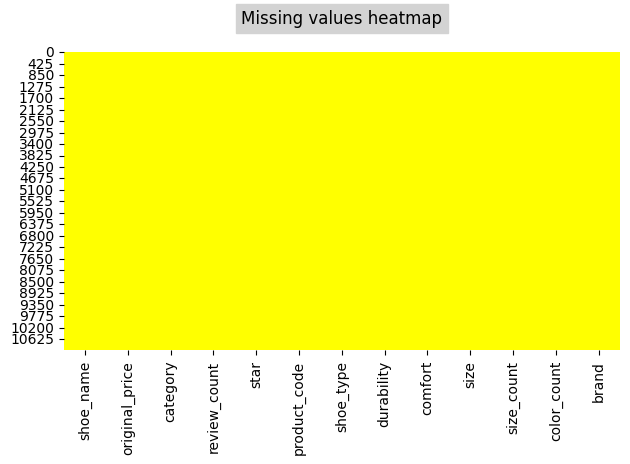

In [511]:
# # Lets visualize it using heatmap
sns.heatmap(df.isnull(), cmap="spring_r", cbar = False).set_title("Missing values heatmap", backgroundcolor='Lightgray', y=1.07)
plt.tight_layout()
plt.show()

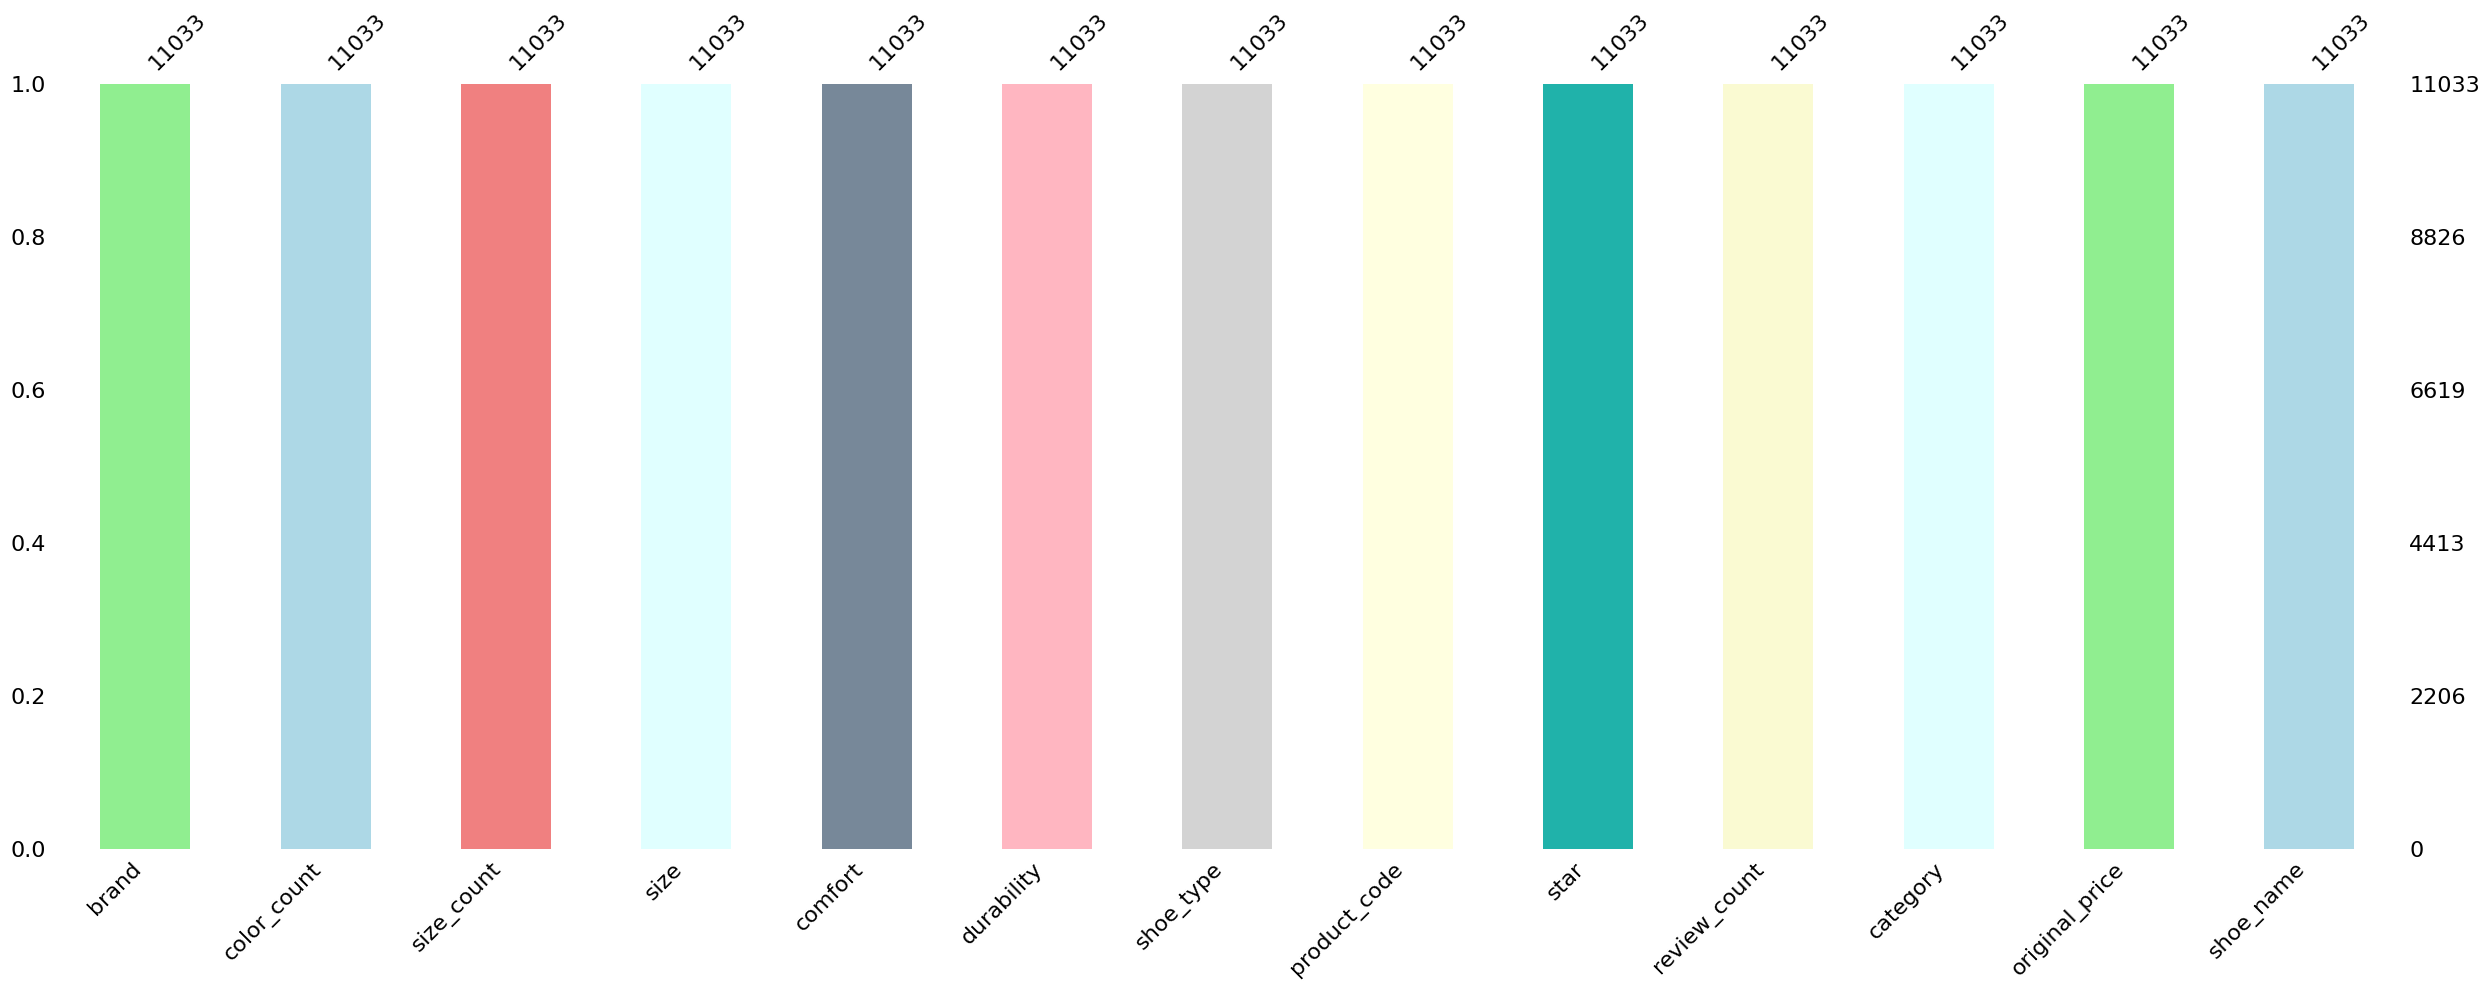

In [512]:
figsize=(4, 4)
light_colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightcyan', 'lightslategray', 'lightpink', 'lightgray', 'lightyellow', 'lightseagreen', 'lightgoldenrodyellow', 'lightcyan']
msno.bar(df, color=light_colors, sort='descending')
plt.tight_layout()
plt.show()

Following the replacement of missing values, in few columns, such as  review_count, star, shoe_type, durability, comfort, size, size_count and  color_count showcase completeness without any remaining null entries. This indicates the dataset has successfully addressed and eliminated missing data, enhancing its overall integrity for further analysis.

**Let's check the DataFrame Information**

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shoe_name       11033 non-null  object 
 1   original_price  11033 non-null  float64
 2   category        11033 non-null  object 
 3   review_count    11033 non-null  float64
 4   star            11033 non-null  float64
 5   product_code    11033 non-null  object 
 6   shoe_type       11033 non-null  object 
 7   durability      11033 non-null  float64
 8   comfort         11033 non-null  float64
 9   size            11033 non-null  float64
 10  size_count      11033 non-null  float64
 11  color_count     11033 non-null  float64
 12  brand           11033 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


**Derived from the provided information post-appropriate adjustments to the data:**

**Data Size:** The dataset contains 11,033 entries and 14 columns.

**Data Types:** data types include float64 (7 columns), int64 (1 column), and object (6 columns), reflecting a diverse mix of numerical and categorical data.

**Completeness:** All columns have non-null counts matching the total number of entries (11,033).

**Numeric Values:** Numeric columns, such as 'original_price', 'review_count', 'star', 'durability', 'comfort', 'size', 'size_count', and 'color_count', feature appropriate float or integer data types.

**Categorical Values:** Categorical columns like 'shoe_name', 'url', 'category', 'product_code', 'shoe_type', and 'brand' are classified as object data types, suitable for handling categorical information.

<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Assessing dataset's categorical and numerical columns</b>
 </div>

In [514]:
# Identifying Categorical Columns
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns]
print("\033[1mNumber of Categorical Columns:\033[0m", len(categorical_columns))
print("\033[1mCategorical Columns:\033[0m", categorical_columns)

Number of Categorical Columns: 5
Categorical Columns: ['shoe_name', 'category', 'product_code', 'shoe_type', 'brand']


In [515]:
# Identifying Numerical Columns
numerical_columns = [col for col in df.select_dtypes(exclude=['object']).columns]
print("\033[1mNumber of Numerical Columns:\033[0m", len(numerical_columns))
print("\033[1mNumerical Columns:\033[0m", numerical_columns)

Number of Numerical Columns: 8
Numerical Columns: ['original_price', 'review_count', 'star', 'durability', 'comfort', 'size', 'size_count', 'color_count']


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">
Data Visualization/Analysis</b>
 </div>

### Let's examine the dataset's statistical information:

In [516]:
# For numerical columns exclusively
df.describe().T

,count,mean,std,min,25%,50%,75%,max
original_price,11033.0,5854.390465,4035.564389,159.0,2999.0,4799.0,7599.0,29999.0
review_count,11033.0,102.244086,615.640715,0.0,0.0,0.0,31.0,19780.0
star,11033.0,1.377894,2.089673,0.0,0.0,0.0,4.3,5.0
durability,11033.0,14.286685,31.954427,0.0,0.0,0.0,0.0,100.0
comfort,11033.0,16.903199,33.325521,0.0,0.0,0.0,0.0,100.0
size,11033.0,24.354754,28.059160,0.0,0.0,0.0,56.0,100.0
size_count,11033.0,4.852624,2.646169,1.0,3.0,5.0,6.0,21.0
color_count,11033.0,3.416025,2.460943,1.0,2.0,3.0,4.0,15.0


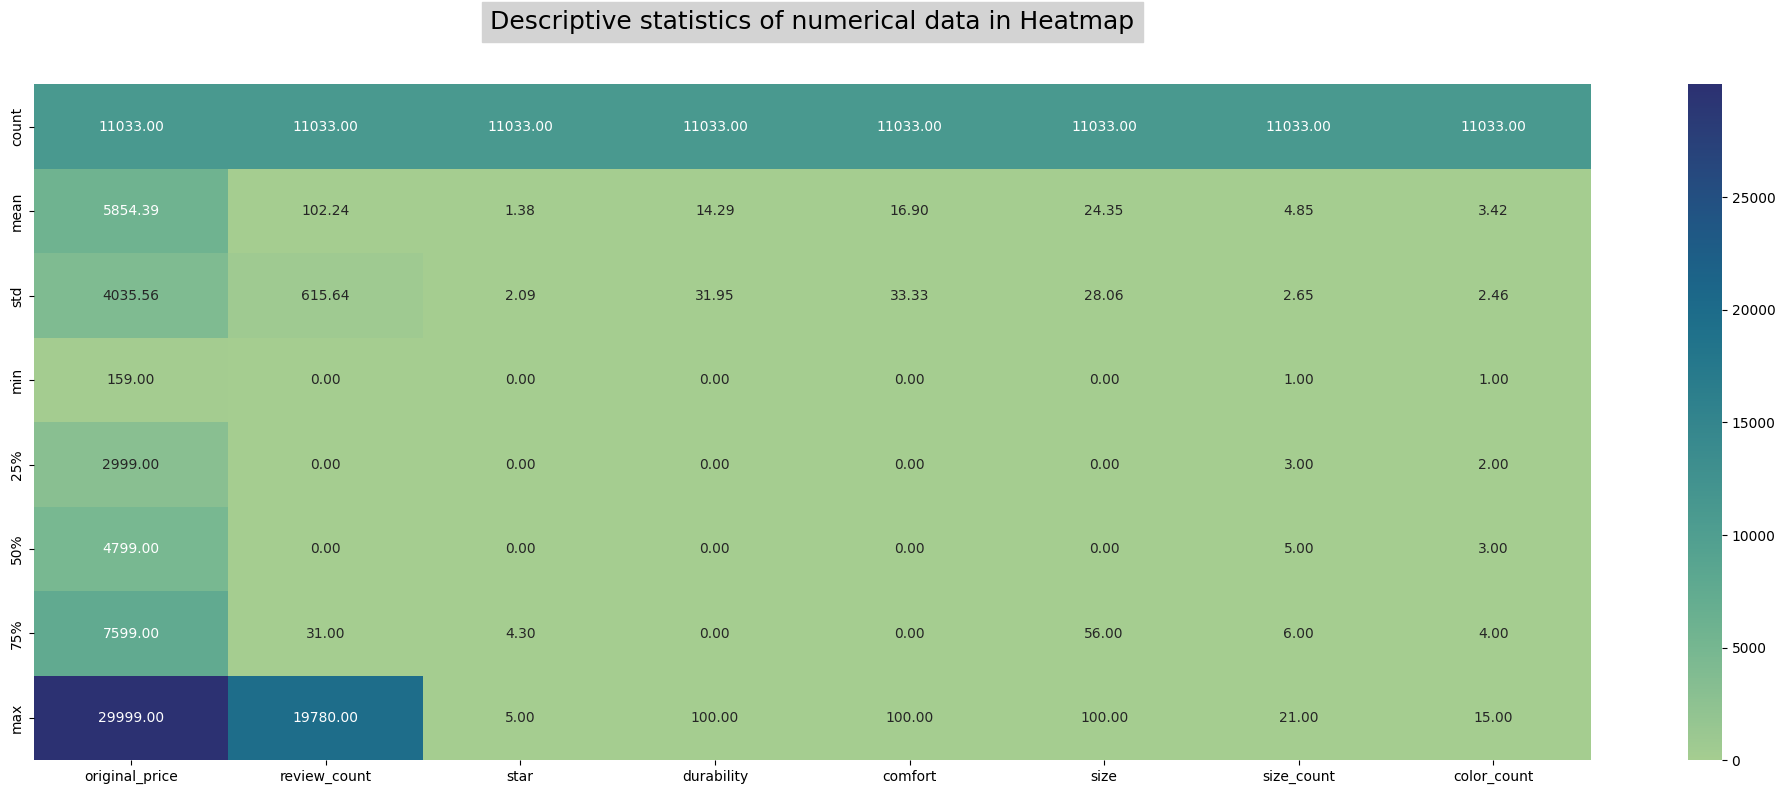

In [517]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.describe(), annot=True, cmap='crest', fmt=".2f")
plt.title("Descriptive statistics of numerical data in Heatmap", backgroundcolor='Lightgray', y=1.07, fontsize=18)
plt.tight_layout()
plt.show()

**Summary of Key Observations:**

**Original Price:**

* Prices range widely from 159.0 to 29,999.0, indicating a diverse pricing structure.
* The mean price is 5,854.39, with a significant standard deviation (4,035.56), suggesting notable price dispersion.

**Review Count:**

* Review counts vary greatly, ranging from 0 to 19,780.
* The mean review count is 102.24, but the high standard deviation (615.64) indicates potential outliers.

**Star Rating:**

* Star ratings range from 0.0 to 5.0, with the majority concentrated around lower values.
* The mean star rating is 1.38, and there is notable variability (standard deviation = 2.09).

**Durability and Comfort:**

* Durability and comfort scores both exhibit significant variability.
* Durability scores range from 0.0 to 100.0, with a mean of 14.29.
Comfort scores range from 0.0 to 100.0, with a mean of 16.90.

**Size:**
* Size ratings vary widely from 0.0 to 100.0, showing substantial diversity.
* The mean size rating is 24.35, with a notable standard deviation (28.06).

**Size Count and Color Count:**
* Size count values range from 1.0 to 21.0, with a mean of 4.85.
* Color count values range from 1.0 to 15.0, with a mean of 3.42.
* Both size count and color count exhibit moderate variability.

### **Univariant Analysis**

In [518]:
# Checking Unique values of all the columns in our dataframe
for col in df.columns.values:
    print("Number of unique values of  \033[1m{} : {}\033[0m ".format(col,df[col].nunique()))

Number of unique values of  shoe_name : 2674 
Number of unique values of  original_price : 563 
Number of unique values of  category : 3 
Number of unique values of  review_count : 309 
Number of unique values of  star : 28 
Number of unique values of  product_code : 7343 
Number of unique values of  shoe_type : 164 
Number of unique values of  durability : 46 
Number of unique values of  comfort : 50 
Number of unique values of  size : 43 
Number of unique values of  size_count : 21 
Number of unique values of  color_count : 15 
Number of unique values of  brand : 6 


**Let's analyze the target or Dependent Variables:**

**Star:-**

0.0    7655
4.7     578
4.5     483
4.6     430
5.0     373
4.8     313
4.4     269
4.3     238
4.0     158
4.9     137
4.2      97
4.1      72
3.8      62
3.9      42
3.0      22
2.0      17
2.7      17
3.6      14
3.7      11
2.3      11
3.5       9
1.5       9
3.4       5
3.2       3
2.6       3
3.1       3
2.5       1
1.0       1
Name: star, dtype: int64


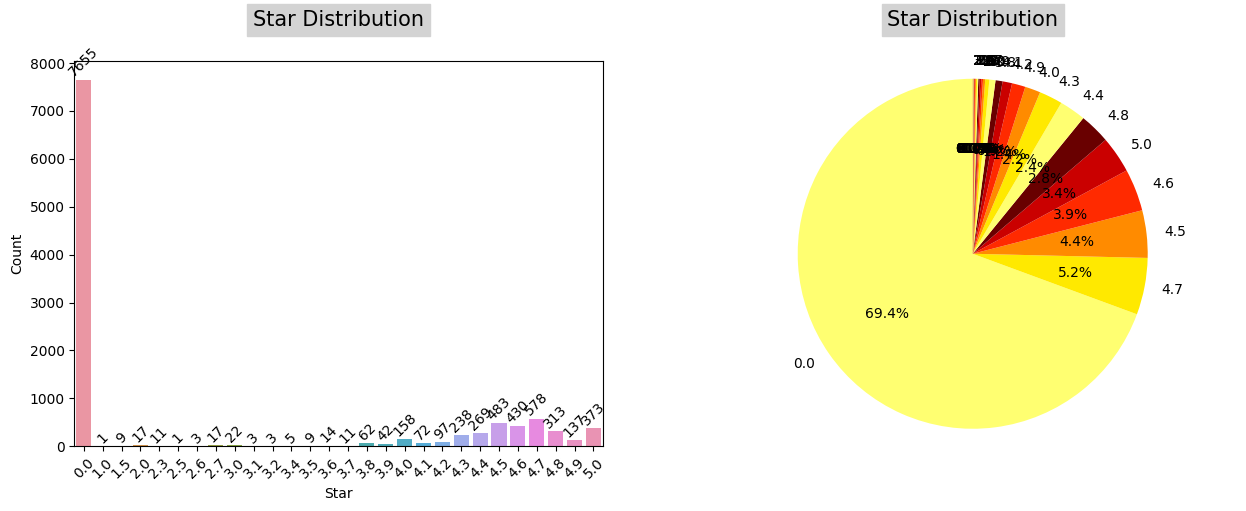

In [519]:
# Count plot for the 'star' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette('Spectral')
sns.countplot(x="star", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="Star", ylabel="Count")
ax1.set_title("Star Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'star'
star_counts = df["star"].value_counts()
print(star_counts)

# Count plot for the 'star' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("Star Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

**Observation:**

* The 'star' column has ratings ranging from 1.0 to 5.0.

* The most common rating is 0.0, occurring 7655 times, indicating shoes without assigned ratings.

* Higher ratings such as 3.5 , 3.6, 3.7, 3.8, 3.9, 4.0 and so on are quite common, suggesting a good number of well-rated shoes.

* Ratings below 3.0 are less frequent, with the lowest being 1.0.

* The ratings show a diverse range, reflecting different customer preferences and satisfaction levels.

**original_price:-**

In [520]:
df[df['original_price']==0.0]

,shoe_name,original_price,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand


In [521]:
df['original_price'].value_counts()

5999.0     442
6999.0     410
4799.0     331
7999.0     302
3599.0     283
          ... 
4699.0       1
1399.0       1
3399.0       1
23999.0      1
1607.0       1
Name: original_price, Length: 563, dtype: int64

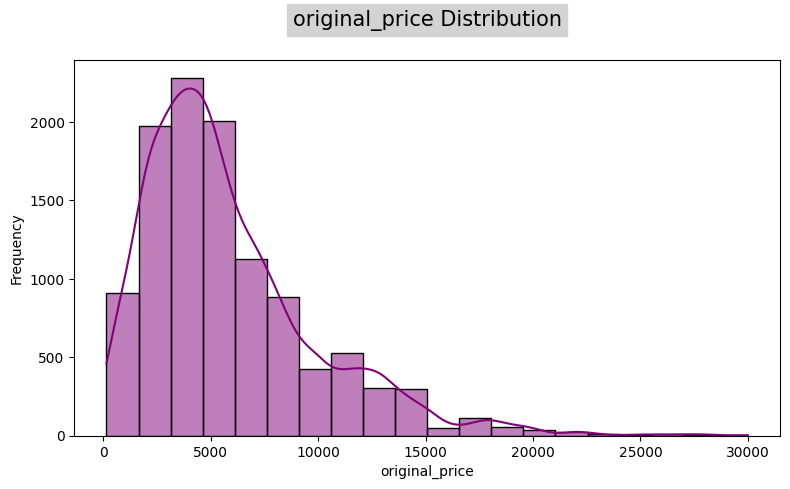

In [522]:
# Histogram for the 'original_price' variable
plt.figure(figsize=(8, 5))
sns.set_palette('RdPu_r')

sns.histplot(data=df, x="original_price", bins=20, kde=True)
plt.xlabel("original_price")
plt.ylabel("Frequency")
plt.title("original_price Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)

plt.tight_layout()
plt.show()

* The 'original_price' column exhibits a diverse range of price points, with various products falling into different price categories.

* The most frequently occurring original prices include 5999.0 (442 occurrences), 6999.0 (410 occurrences), 4799.0 (322 occurrences), 7999.0 (302 occurrences), and 3599.0 (283 occurrences), showcasing a distribution that spans multiple price levels. Additionally, there are less common prices, such as 4699.0, 1399.0, 3399.0, 23999.0, and 1607.0, with only one occurrence each. This suggests a wide spectrum of pricing within the dataset.

**Let's analyze the Independent vaariables:-**

**shoe_name:-**

In [523]:
df['shoe_name'].value_counts()

Transport unisex Running Shoes                            150
UNO - STAND ON AIR                                        138
Reflect Lite unisex Running Shoes                          64
Disperse XT 3 unisex Training Shoes                        52
ULTRABOUNCE SHOES                                          49
                                                         ... 
BLACK Comfort Floaters                                      1
Daze V2 unisex Sneakers                                     1
Woodland DENIM Back Strap Floater Sandals                   1
Clyde's Closet All-Pro NITRO unisex Basketball Shoes        1
Deviate Nitro 2 Winterised women's Trail Running Shoes      1
Name: shoe_name, Length: 2674, dtype: int64

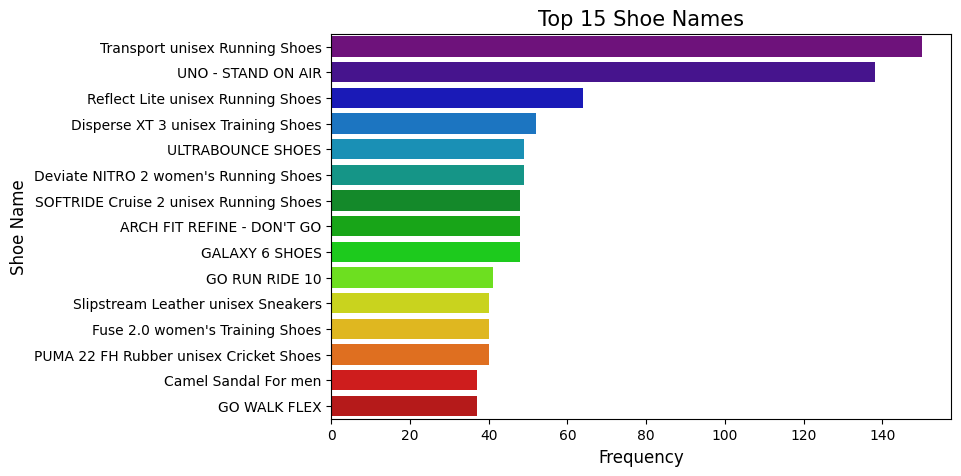

In [524]:
# barplot for the 'shoe_name' variable
plt.figure(figsize=(8, 5))
sns.barplot(y=df['shoe_name'].value_counts().index[:15], x=df['shoe_name'].value_counts()[:15], palette='nipy_spectral')
plt.title('Top 15 Shoe Names', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Shoe Name', fontsize=12)
plt.show()

* The 'shoe_name' column features a diverse collection of shoe models, where "Transport unisex Running Shoes" takes the lead with 150 occurrences.

* Other popular models include "UNO - STAND ON AIR" (138 occurrences), "Reflect Lite unisex Running Shoes" (64 occurrences), and "Disperse XT 3 unisex Training Shoes" (52 occurrences). The dataset encompasses a total of 2,674 unique shoe names, reflecting a wide range of footwear options.

* Notably, unique names like "BLACK Comfort Floaters," "Daze V2 unisex Sneakers," "Woodland DENIM Back Strap Floater Sandals," and "Deviate Nitro 2 Winterised women's Trail Running Shoes" each appear only once in the dataset.

**product_code:-**

In [525]:
df['product_code'].value_counts()

377028_23               10
377028_27               10
377028_01               10
377028_02               10
377028_03               10
                        ..
FGC031039112A-NAVY       1
FGC028030281A-BLACK      1
FGC028030281A-DGREEN     1
370282_09                1
IQ8888                   1
Name: product_code, Length: 7343, dtype: int64

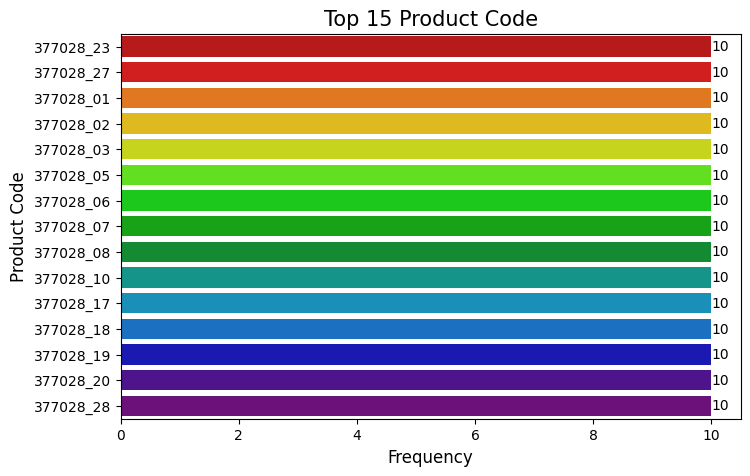

In [526]:
# barplot for the 'product_code' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(y=df['product_code'].value_counts().index[:15], x=df['product_code'].value_counts()[:15], palette='nipy_spectral_r')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 15 Product Code', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Product Code', fontsize=12)
plt.show()

* product codes such as '377028_23', '377028_27', '377028_01', '377028_02', and '377028_03' each occur 10 times. The dataset comprises a total of 7,343 unique product codes, showcasing the variety of products available. Additionally, there are product codes like 'FGC031039112A-NAVY', 'FGC028030281A-BLACK', 'FGC028030281A-DGREEN', '370282_09', and 'IQ8888', each occurring only once.

**category:-**

men       5652
women     3173
unisex    2208
Name: category, dtype: int64


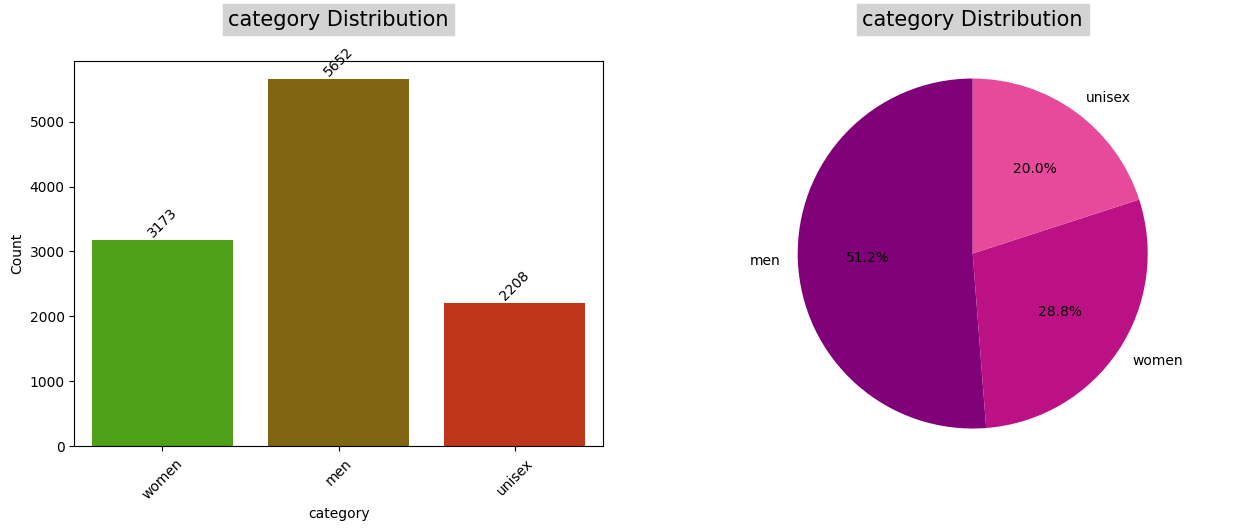

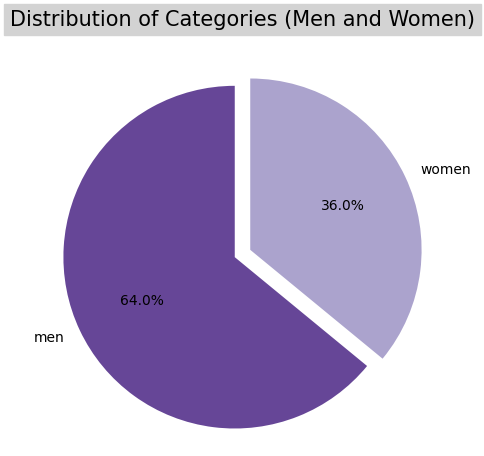

In [527]:
# Count plot for the 'category' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette('brg_r')
sns.countplot(x="category", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="category", ylabel="Count")
ax1.set_title("category Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'star'
star_counts = df["category"].value_counts()
print(star_counts)

# Count plot for the 'star' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("category Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)


subset_df = df[df['category'].isin(['men', 'women'])]

# Count plot for the 'category' variable
plt.figure(figsize=(5, 5))
sns.set_palette('PuOr_r')
category_counts = subset_df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.axis('equal')
plt.title("Distribution of Categories (Men and Women)", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()


* The majority of entries belong to the 'men' category, totaling 5,652 occurrences. The 'women' category follows with 3,173 occurrences, and the 'unisex' category has 2,208 occurrences.

**The presence of the 'unisex' category in the shoe dataset indicates that there are shoes designed to be suitable for both men and women. Unisex footwear is designed to be worn by individuals of any gender, emphasizing a universal fit.**

**review_count:-**

In [528]:
df['review_count'].value_counts()

0.0      5779
1.0       326
2.0       205
3.0       191
7.0       125
         ... 
182.0       1
196.0       1
206.0       1
263.0       1
110.0       1
Name: review_count, Length: 309, dtype: int64

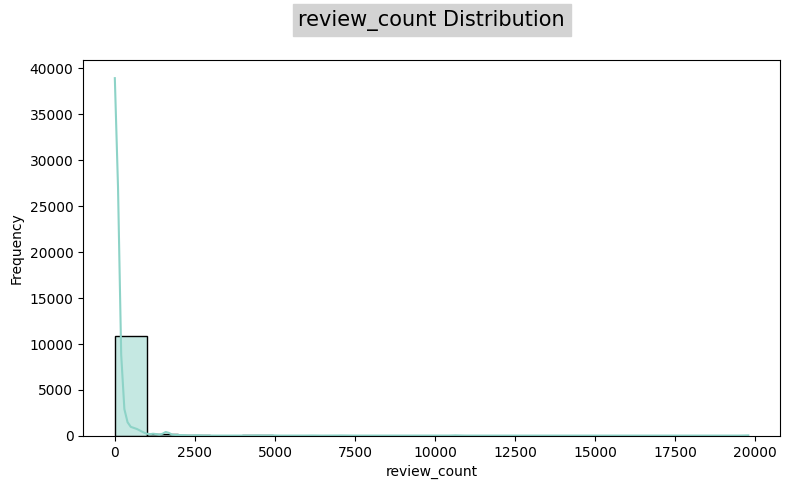

In [529]:
# Histogram for the 'review_count' variable
plt.figure(figsize=(8, 5))
sns.set_palette('Set3')

sns.histplot(data=df, x="review_count", bins=20, kde=True)
plt.xlabel("review_count")
plt.ylabel("Frequency")
plt.title("review_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)

plt.tight_layout()
plt.show()

* The majority of shoes (5,779) have zero reviews, followed by 326 shoes with one review and 205 shoes with two reviews.

* The distribution shows a decreasing trend, with fewer shoes having higher review counts.

**shoe_type:-**

In [530]:
df['shoe_type'].value_counts()

Sneakers                      3900
Running Shoes                 1101
Shoes                          858
Running                        790
Sportswear                     564
                              ... 
FG Low-Top Football Boot         1
Athletics Sprinting Spikes       1
Cool Cat 2.0 Youth Slides        1
MG High-Top Football Boot        1
Custom Workout Shoes             1
Name: shoe_type, Length: 164, dtype: int64

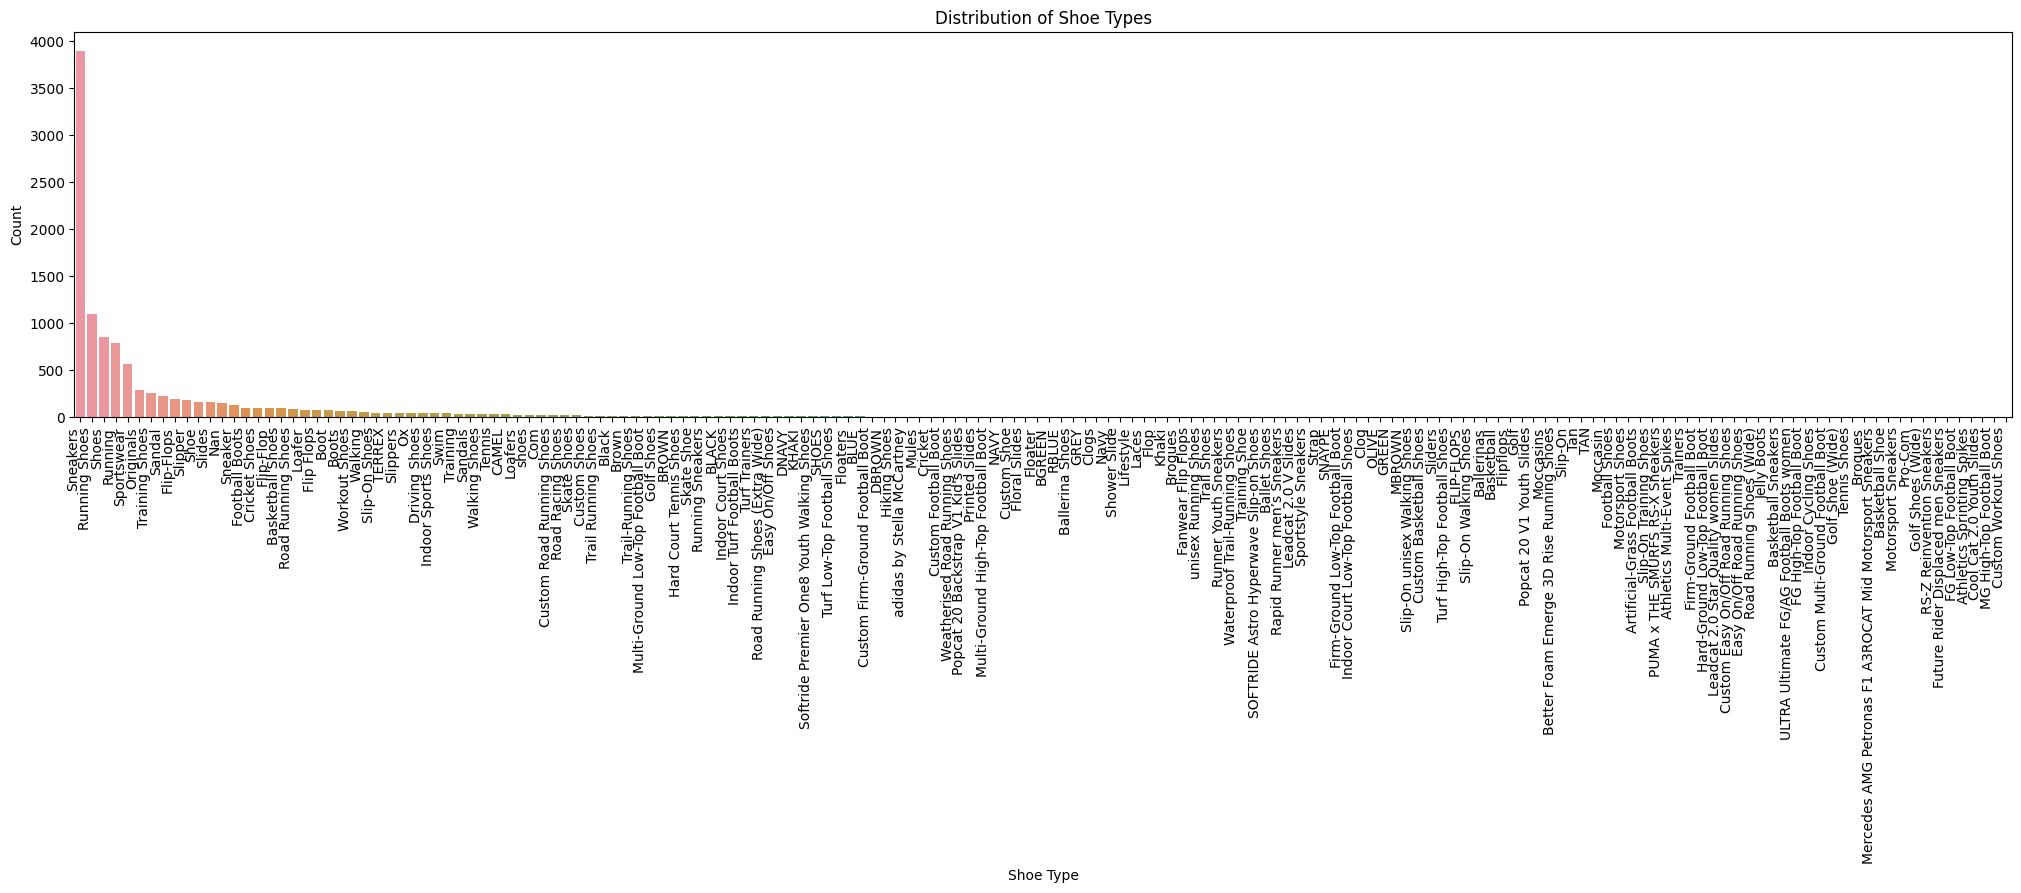

In [531]:
# count plot for the 'shoe_type' variable
plt.figure(figsize=(25,5))
sns.set_palette('viridis')
sns.countplot(x='shoe_type', data=df, order=df['shoe_type'].value_counts().index)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Shoe Type')
plt.ylabel('Count')
plt.title('Distribution of Shoe Types')
plt.show()

* The 'shoe_type' variable provides insight into the distribution of different types of shoes in the dataset. The most prevalent category is "Sneakers" with 3900 occurrences, followed by "Running Shoes" with 1101 occurrences and "Shoes" with 858 occurrences.

* The dataset encompasses a total of 164 unique shoe types, showcasing a diverse range of footwear styles.

**durability:-**

0.0      9173
87.0      175
85.0      156
89.0      140
86.0      133
88.0      116
91.0      115
83.0      114
84.0      111
100.0     110
90.0      103
81.0       72
75.0       60
77.0       49
82.0       45
93.0       41
78.0       41
80.0       31
95.0       27
72.0       23
79.0       22
76.0       21
92.0       18
62.0       17
70.0       13
74.0       12
66.0       10
71.0       10
97.0        9
50.0        7
68.0        6
25.0        6
73.0        5
37.0        5
64.0        5
65.0        4
94.0        4
96.0        4
60.0        3
63.0        3
8.0         3
54.0        3
67.0        2
58.0        2
61.0        2
98.0        2
Name: durability, dtype: int64


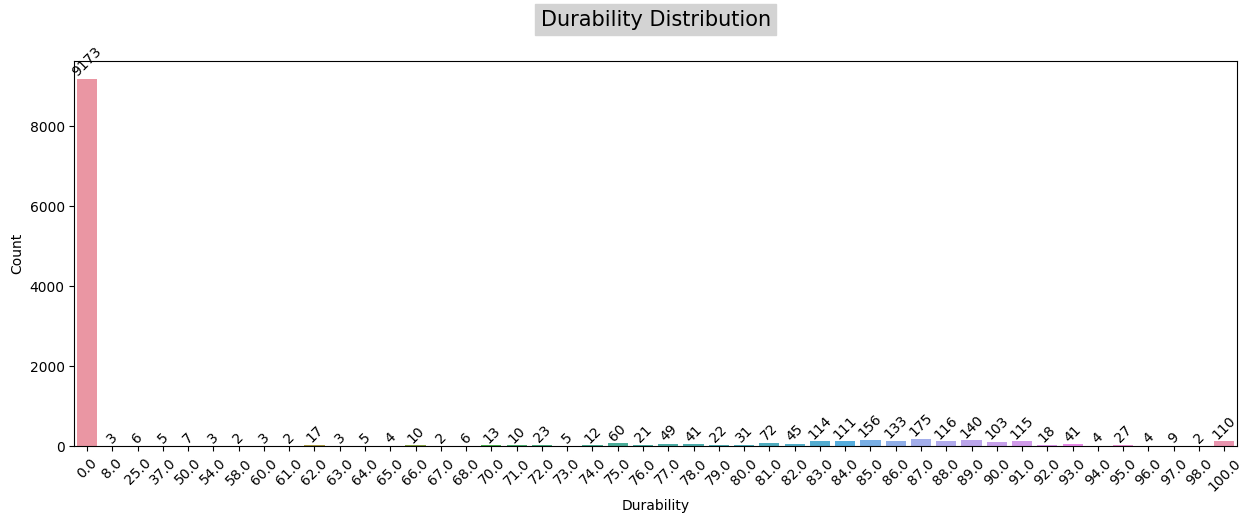

In [532]:
# Count plot for the 'durability' variable
plt.figure(figsize=(15, 5))
sns.set_palette('crest')
ax = sns.countplot(x="durability", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="Durability", ylabel="Count")
ax.set_title("Durability Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'durability'
durability_counts = df["durability"].value_counts()
print(durability_counts)

plt.show()

* The 'durability' column exhibits a diverse distribution, with the majority of shoes having a durability rating of 0.0. A rating of 0.0 signifies that the data is unavailable on the respective websites, and in some cases, the categorization for shoe size ratings are missing or undefined.

* durability ratings are spread across various values, with notable occurrences at 87.0, 85.0, 89.0, and 86.0. The dataset includes a range of durability ratings, with a peak at 100.0. There are also instances of lower ratings such as 8.0, 25.0, and 37.0.

**comfort:-**

0.0      8726
100.0     266
84.0      175
75.0      150
82.0      139
85.0      131
83.0      128
79.0      113
80.0       98
86.0       98
81.0       90
88.0       87
50.0       82
78.0       78
87.0       68
77.0       56
89.0       50
67.0       48
90.0       43
65.0       39
73.0       37
70.0       32
74.0       31
76.0       30
71.0       23
91.0       22
66.0       21
92.0       20
68.0       17
72.0       17
69.0       16
62.0       11
58.0       11
93.0       11
63.0       10
25.0        9
64.0        8
60.0        7
34.0        5
56.0        5
95.0        4
97.0        3
33.0        3
59.0        3
52.0        3
54.0        3
98.0        2
61.0        2
96.0        1
43.0        1
Name: comfort, dtype: int64


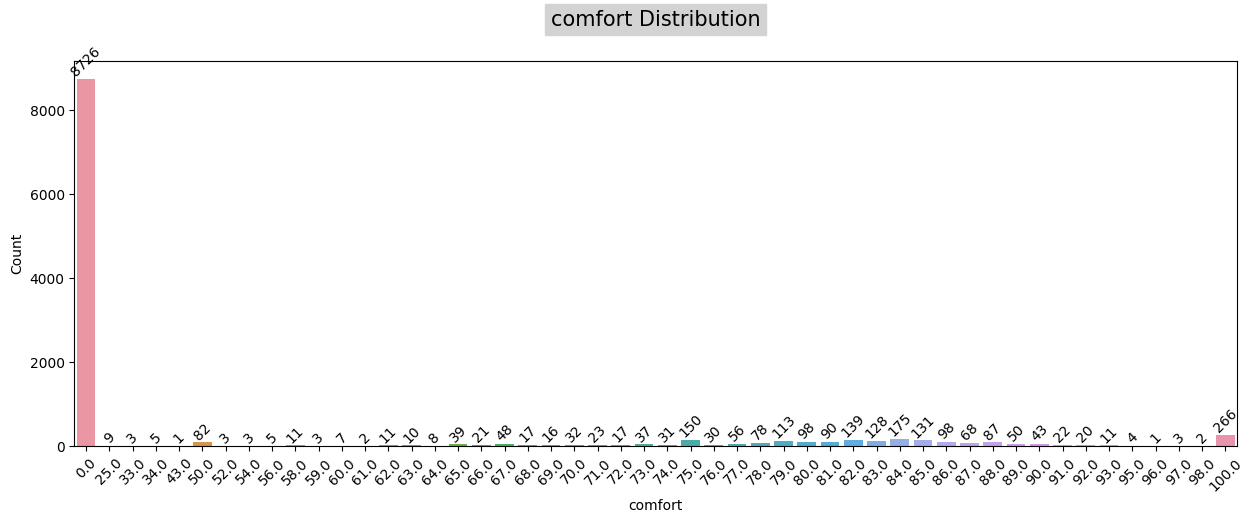

In [533]:
# Count plot for the 'comfort' variable
plt.figure(figsize=(15, 5))
sns.set_palette('copper_r')
ax = sns.countplot(x="comfort", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="comfort", ylabel="Count")
ax.set_title("comfort Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'comfort'
comfort_counts = df["comfort"].value_counts()
print(comfort_counts)

plt.show()

* The 'comfort' column displays a range of comfort ratings, with a significant number of shoes having a comfort rating of 0.0. Additionally, there are shoes with higher comfort ratings, including a peak at 100.0. The distribution includes various comfort ratings, with notable occurrences at 84.0, 75.0, 82.0, and 85.0.

**size:-**

0.0      6186
60.0     2465
50.0      691
51.0      222
53.0      135
47.0      123
48.0      108
49.0       99
52.0       85
54.0       82
46.0       79
44.0       75
80.0       62
55.0       56
41.0       45
56.0       42
57.0       42
45.0       41
75.0       38
43.0       38
25.0       37
40.0       36
42.0       31
67.0       26
38.0       24
58.0       19
100.0      17
62.0       17
63.0       14
34.0       12
59.0       11
69.0       10
37.0       10
17.0       10
65.0        9
61.0        9
20.0        8
29.0        6
12.0        5
39.0        3
68.0        2
32.0        2
30.0        1
Name: size, dtype: int64


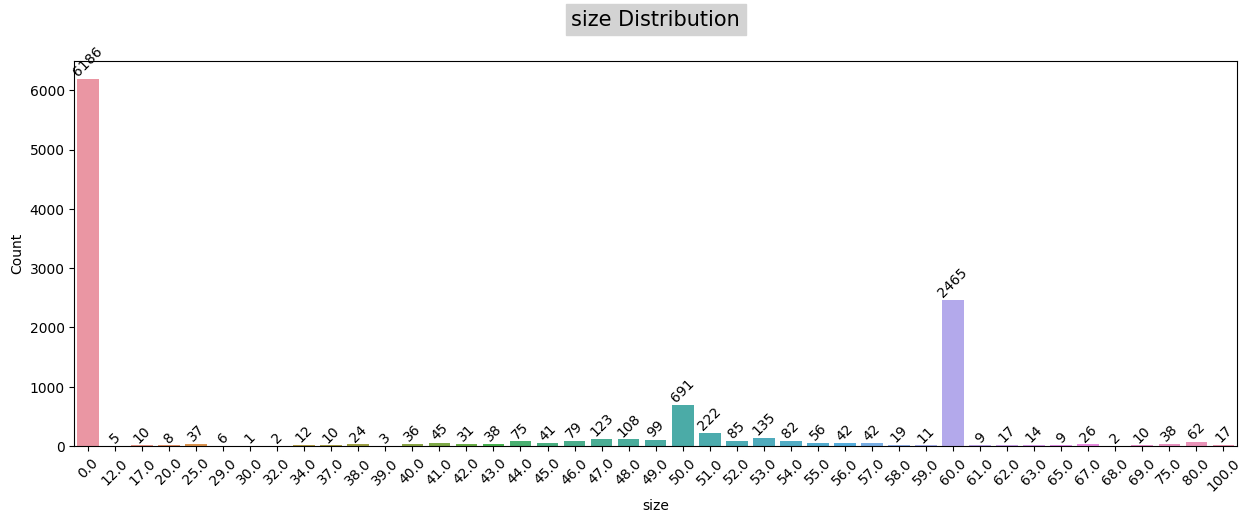

In [534]:
# Count plot for the 'size' variable
plt.figure(figsize=(15, 5))
sns.set_palette('copper')
ax = sns.countplot(x="size", data=df)
for i in ax.containers:
    ax.bar_label(i, rotation=45)

ax.set(xlabel="size", ylabel="Count")
ax.set_title("size Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'size'
size_rating_counts = df["size"].value_counts()
print(size_rating_counts)

plt.show()

* The 'size' column represents size ratings for shoes, with the most common rating being 0.0. A rating of 0.0 signifies that the data is unavailable on the respective websites, and in some cases, the categorization for shoe size ratings are missing or undefined.

* The dataset includes a range of size ratings, such as 60.0, 50.0, 51.0, and others. These size ratings likely correspond to different categories, such as small, regular, and so on, rather than numerical shoe sizes.

**size_count:-**

5.0     4321
6.0     1791
1.0     1081
2.0      979
4.0      846
3.0      801
7.0      482
13.0     201
12.0     110
11.0      95
9.0       61
8.0       60
10.0      51
17.0      45
15.0      45
14.0      25
16.0      17
18.0      15
19.0       3
21.0       2
20.0       2
Name: size_count, dtype: int64


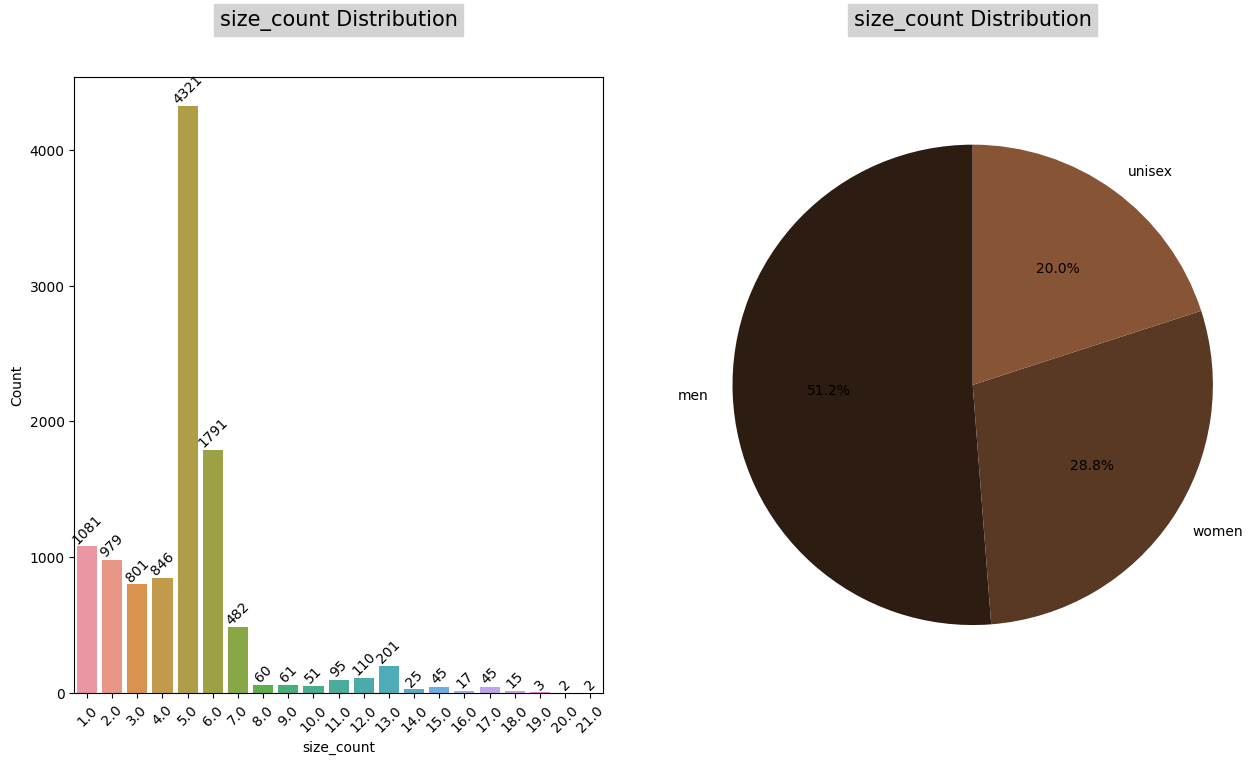

In [535]:
# Count plot for the 'size_count' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.set_palette('PiYG')
sns.countplot(x="size_count", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="size_count", ylabel="Count")
ax1.set_title("size_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'size_count'
size_counts = df["size_count"].value_counts()
print(size_counts)

# Count plot for the 'size_count' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("size_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

* The majority of 'size_count' data are falling into the range of 0.0 to 7.0.

* Size 0.0 is the most common, occurring 3230 times, followed by size 6.0 with 1791 occurrences and size 5.0 with 1091 occurrences.

* The distribution continues with sizes 1.0 to 7.0, and there are fewer instances of larger sizes, with sizes 13.0, 12.0, and 11.0 having 201, 110, and 95 occurrences, respectively.

**color_count:-**

2.0     3241
3.0     2602
1.0     1596
4.0     1253
5.0      717
6.0      549
8.0      390
7.0      320
15.0     165
9.0       80
11.0      40
10.0      39
12.0      19
14.0      15
13.0       7
Name: color_count, dtype: int64


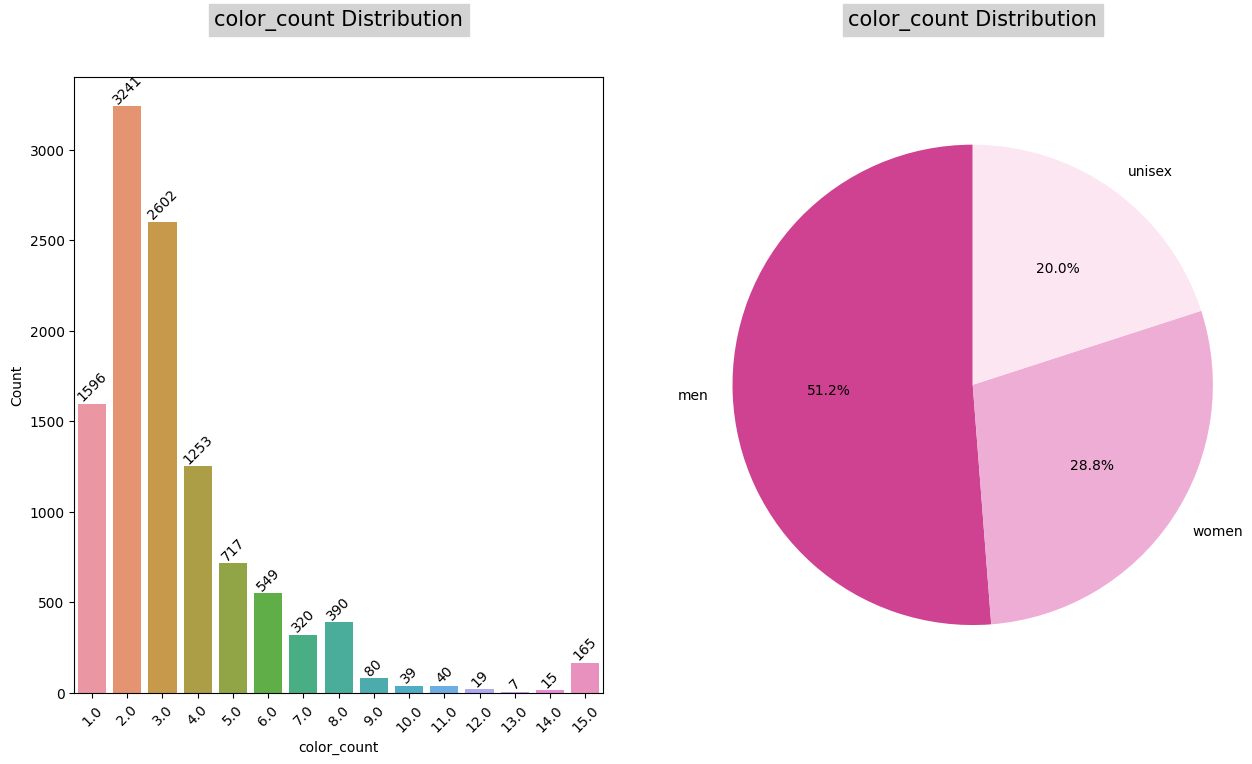

In [536]:
# Count plot for the 'color_count' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.set_palette('hot_r')
sns.countplot(x="color_count", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i, rotation=45)

ax1.set(xlabel="color_count", ylabel="Count")
ax1.set_title("color_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
ax1.tick_params(axis='x', rotation=45)

# Unique value_counts for column 'color_count'
color_counts = df["color_count"].value_counts()
print(color_counts)

# Count plot for the 'color_count' variable
ax2.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')
ax2.set_title("color_count Distribution", fontsize=15, backgroundcolor='lightgray', color='black', y=1.07)
plt.show()

* Color category 2 has the highest occurrence, appearing 3241 times, followed by category 3 with 2580 occurrences and category 1 with 1596 occurrences.

* The distribution continues with colors 4 to 15, where the frequency gradually decreases. Colors 13, 12, 14, and 15 have relatively lower occurrences, each appearing only a few times in the dataset.

**brand:-**

Puma        3434
skechers    2537
adidas      2030
Woodland    1990
Nike         908
columbia     134
Name: brand, dtype: int64


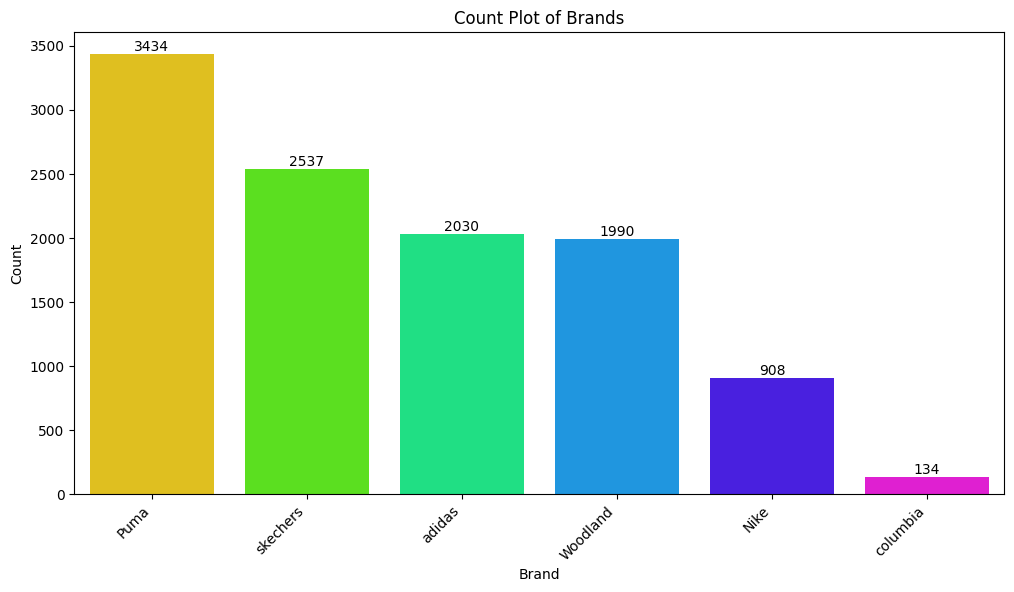

In [537]:
# count plot for 'brand' variable
plt.figure(figsize=(12, 6))
ax=sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index, palette='hsv')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count Plot of Brands')

# Unique value_counts for column 'brand'
brand_counts = df["brand"].value_counts()
print(brand_counts)

plt.show()

* The brand distribution in the dataset is led by Puma, which has the highest frequency of 3434 occurrences. Skechers and Adidas follow with 2537 and 2030 occurrences, respectively. Woodland and Nike also contribute significantly, with 1990 and 908 occurrences, while Columbia is less represented with 134 occurrences.

### **Bivariant Analysis**

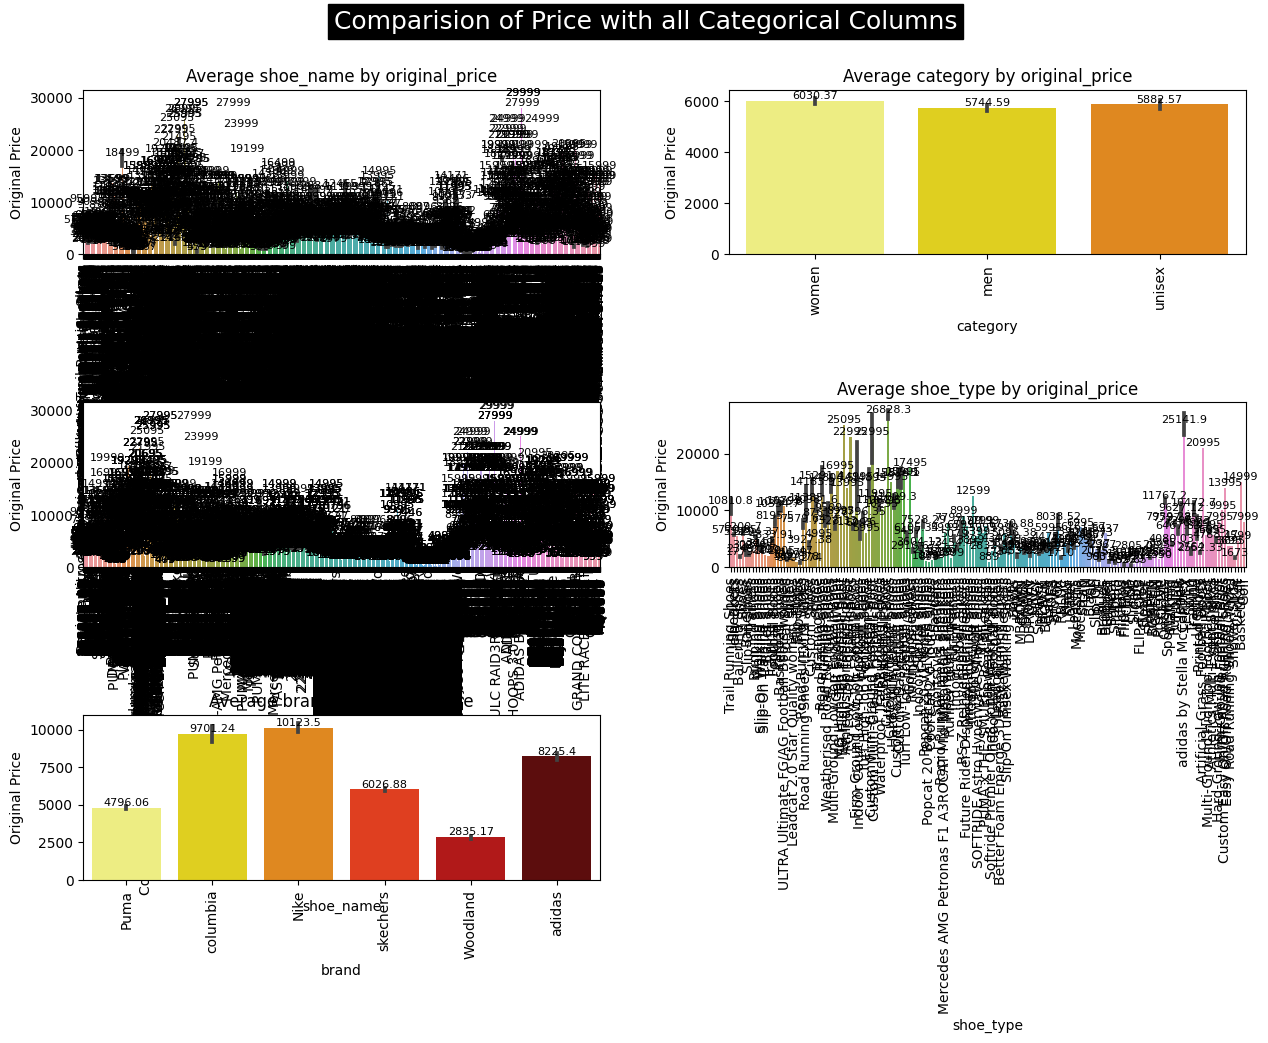

In [544]:
plt.figure(figsize=(15, 10))
plt.suptitle("Comparision of Price with all Categorical Columns", fontsize=18, backgroundcolor='black', color='white')

for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)

    # Create a side-by-side bar plot for the current numerical column
    ax = sns.barplot(x=col, y='original_price', data=df)

    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

    plt.title(f"Average {col} by original_price", fontsize=12)
    plt.xlabel(f"{col}")
    plt.ylabel("Original Price")

    plt.xticks(rotation=90)

plt.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.9, wspace=0.25)
plt.show()

In [546]:
# original_price vs shoe_name
pd.crosstab(df['original_price'], df['shoe_name'])

shoe_name,4DFWD 3 RUNNING SHOES,A LINEAR - JOZLYN,ADI DASH SHOES,ADI DASSLER ADIFOM TRXN,ADI FF SLIPPERS,ADI OSPARNA SHOES,ADI REVUP M,ADI STRIDX M,ADI ZOOM SHOES,ADI-SHAWT SPORT INSPIRED SHOES,...,ZENITH FLIP-FLOPS,ZIGGY - JOLA,ZIGGY-SOUTH PASS,ZNTASY LIGHTMOTION+ LIFESTYLE ADULT SHOE,ZX 700 HD SHOES,Zeal men's Sandals,Zeta men's Running Shoes,Zion 2 'Full Moon' PF,Zod Runner women's Sneakers,Zora women's Sneakers
original_price,,,,,,,,,,,,,,,,,,,,,
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [548]:
# original_price vs color_count
pd.crosstab(df['original_price'], df['color_count'])

color_count,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
original_price,,,,,,,,,,,,,,,
159.0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
270.0,0,8,6,0,0,0,0,0,0,0,0,0,0,0,0
321.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995.0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
26995.0,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0
27995.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [549]:
# original_price vs product_code
pd.crosstab(df['original_price'], df['product_code'])

product_code,100160-GRY,100160-TPE,100453-NVY,100453-TPE,104163-NVCL,104164-CHAR,104164-MVE,104164-NVBL,104164-PLUM,104164-RAS,...,IR0537,IR0538,M18209,M18444,Q47225,YL5934-005,YL5934-010,YL8651-010,YL8651-033,YM8651-010
original_price,,,,,,,,,,,,,,,,,,,,,
159.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27995.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**original_price vs brand:**

The pricing distribution spans various brands, predominantly falling within the mid-range. Some outliers are notable, such as a Woodland shoe priced at 159, necessitating further investigation to comprehend these exceptions.

**original_price vs shoe_name:**

Prices exhibit variability across specific shoe names, with some maintaining consistent pricing and others displaying significant fluctuations. For instance, the Y-3 KYASU LO is priced at 34,999.0, while the Y-3 NIZZA BOOT is priced at 39,999.0.

**original_price vs category:**

Price variations exist across different categories, with the majority in the men's category. Anomalies, such as a 159 price point for men's shoes, are observed, and higher prices are noted in the Unisex category.

**original_price vs color_count:**

Distinct colors correspond to varying price ranges. For instance, BLACK-colored shoes show diverse prices, including 39,999.0, while TURQUOISE-colored shoes are priced at 159.0.

**original_price vs product_code:**

Each product code has an associated original_price, and instances occur where the same product code reflects different prices. For example, the product code FGC0Q6036962A is priced at 159.0, while FGC0Q6036972A is priced at 166.0.

**original_price vs star:

original_price are linked to different star ratings, with a majority categorized as "Not Available" in the Rating column. Further exploration is recommended to discern the relationship between price and rating.

In [539]:
df

,shoe_name,original_price,category,review_count,star,product_code,shoe_type,durability,comfort,size,size_count,color_count,brand
0,Deviate Nitro 2 Winterised women's Trail Runni...,9599.0,women,0.0,0.0,376857_01,Trail Running Shoes,0.0,0.0,0.0,4.0,1.0,Puma
1,Cilia Lux women's Sneakers,3299.0,women,0.0,0.0,370282_09,Sneakers,0.0,0.0,0.0,1.0,1.0,Puma
2,Fier Nitro women's Sneakers,4799.0,women,0.0,0.0,389932_01,Sneakers,0.0,0.0,0.0,3.0,2.0,Puma
3,Fier Nitro women's Sneakers,4799.0,women,0.0,0.0,389932_02,Sneakers,0.0,0.0,0.0,2.0,2.0,Puma
4,Cali Dream Brand Love women's Sneakers,4499.0,women,0.0,0.0,394757_01,Sneakers,0.0,0.0,0.0,1.0,2.0,Puma
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,FORUM BOLD SHOES,10999.0,women,28.0,0.0,IG0285,Originals,85.0,75.0,49.0,5.0,2.0,adidas
11029,ADIZERO SL,11999.0,men,492.0,0.0,ID6921,Running,86.0,82.0,46.0,5.0,2.0,adidas
11030,ADIZERO SL,11999.0,men,492.0,0.0,ID6926,Running,86.0,82.0,46.0,5.0,2.0,adidas
11031,CONTEM X SHOES,3999.0,women,3.0,0.0,IQ8887,Running,91.0,91.0,50.0,5.0,2.0,adidas


<div style="background-color: #E7BCDE; padding: 20px; text-align: center; font-size: 25px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>